In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer

import pickle




sns.set()

#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)


# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [27]:
df = pd.read_csv("/home/administrator/Used_Car_Price_Prediction/data/vehicles.csv")

In [3]:
df.sample(50).head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
325249,7316200280,salem,0,2015.0,gmc,sierra 2500,NaN,8 cylinders,diesel,114643.0,clean,automatic,1GT12ZE80FF128696,4wd,NaN,truck,NaN,or
88434,7316375908,"washington, DC",2700,2004.0,chevrolet,suburban 2500,NaN,NaN,gas,230000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,dc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [28]:
missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])

missing_values

,Features,Missing %
0,id,0.0
1,region,0.0
2,price,0.0
3,year,0.0
4,manufacturer,4.0
5,model,1.0
6,condition,41.0
7,cylinders,42.0
8,fuel,1.0
9,odometer,1.0


In [29]:
df[df.isna().sum(axis=1) > 11]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368797,7316880457,dallas / fort worth,7900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
372596,7310515013,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
375886,7315179022,houston,7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
402274,7291716547,bellingham,25956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa


In [198]:
df.cylinders.value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

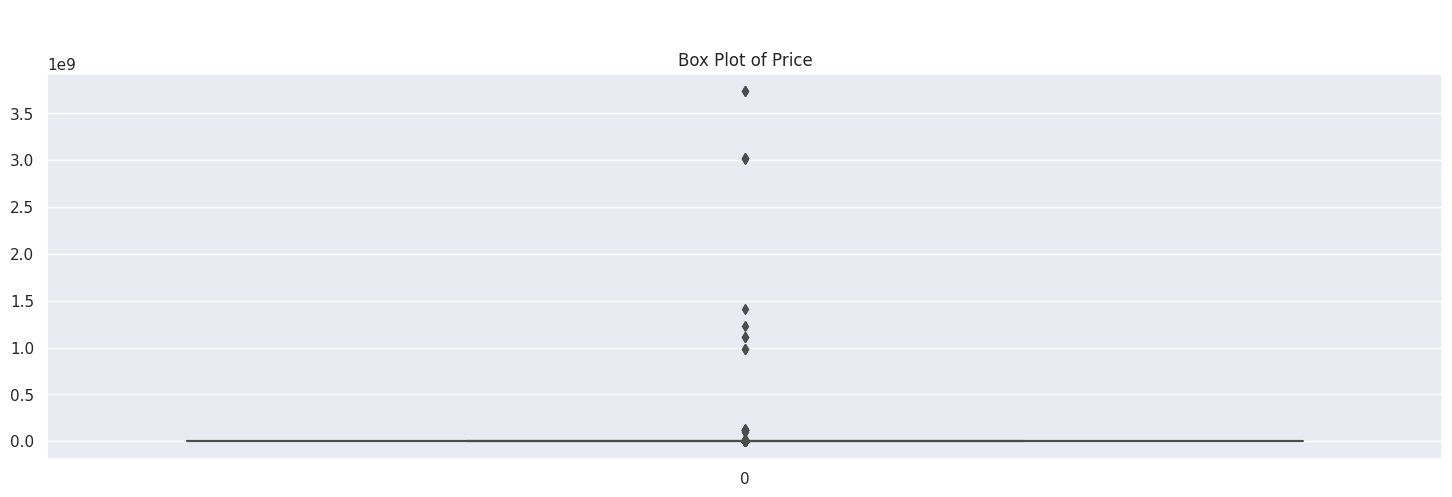

In [16]:
sns.boxplot(df["price"]);
plt.title("\n\nBox Plot of Price");


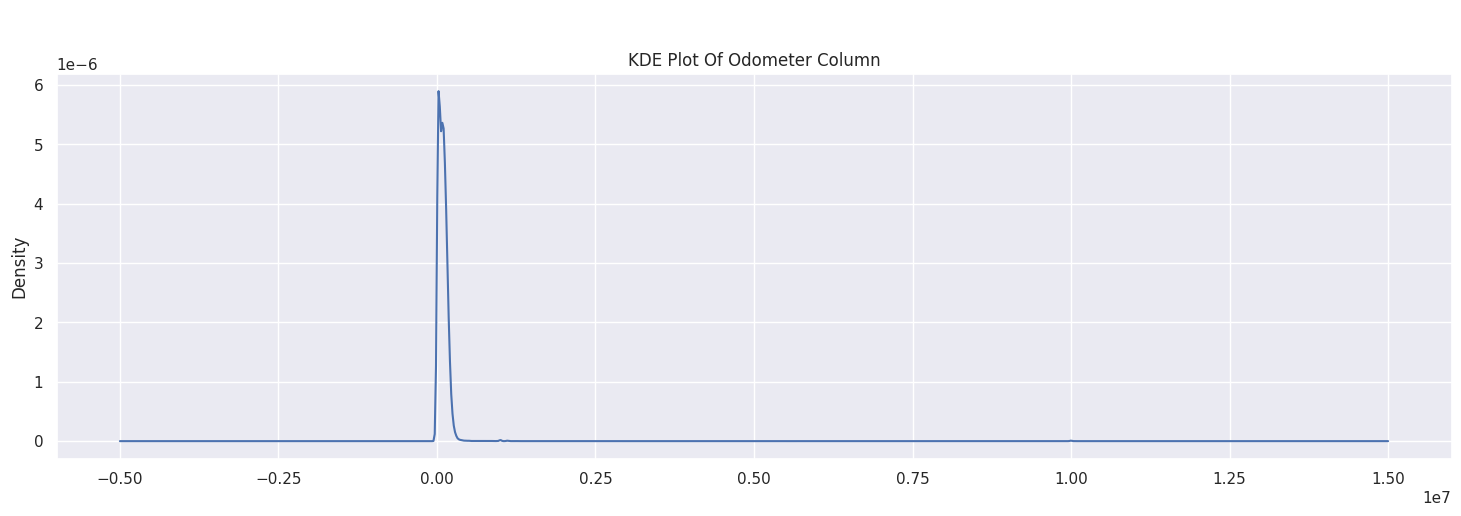

In [18]:
df["odometer"].plot(kind="kde");
plt.title("\n\nKDE Plot Of Odometer Column");

In [20]:
df["odometer"].describe().reset_index()

,index,odometer
0,count,4.224800e+05
1,mean,9.804333e+04
2,std,2.138815e+05
3,min,0.000000e+00
4,25%,3.770400e+04
5,50%,8.554800e+04
6,75%,1.335425e+05
7,max,1.000000e+07


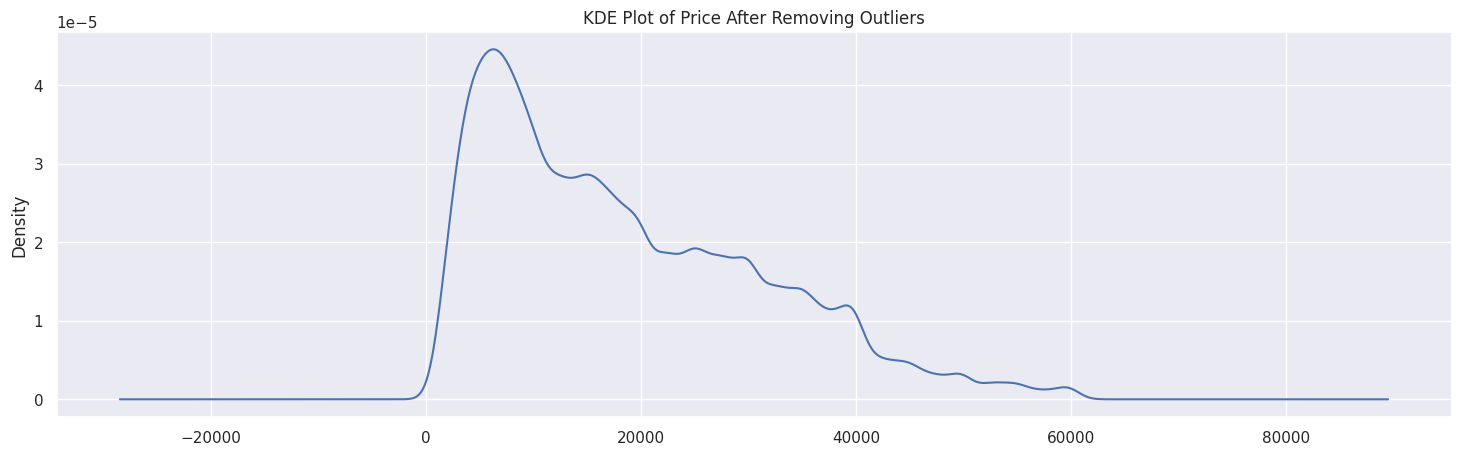

In [26]:
df_copy["price"].plot(kind="kde");
plt.title("KDE Plot of Price After Removing Outliers");

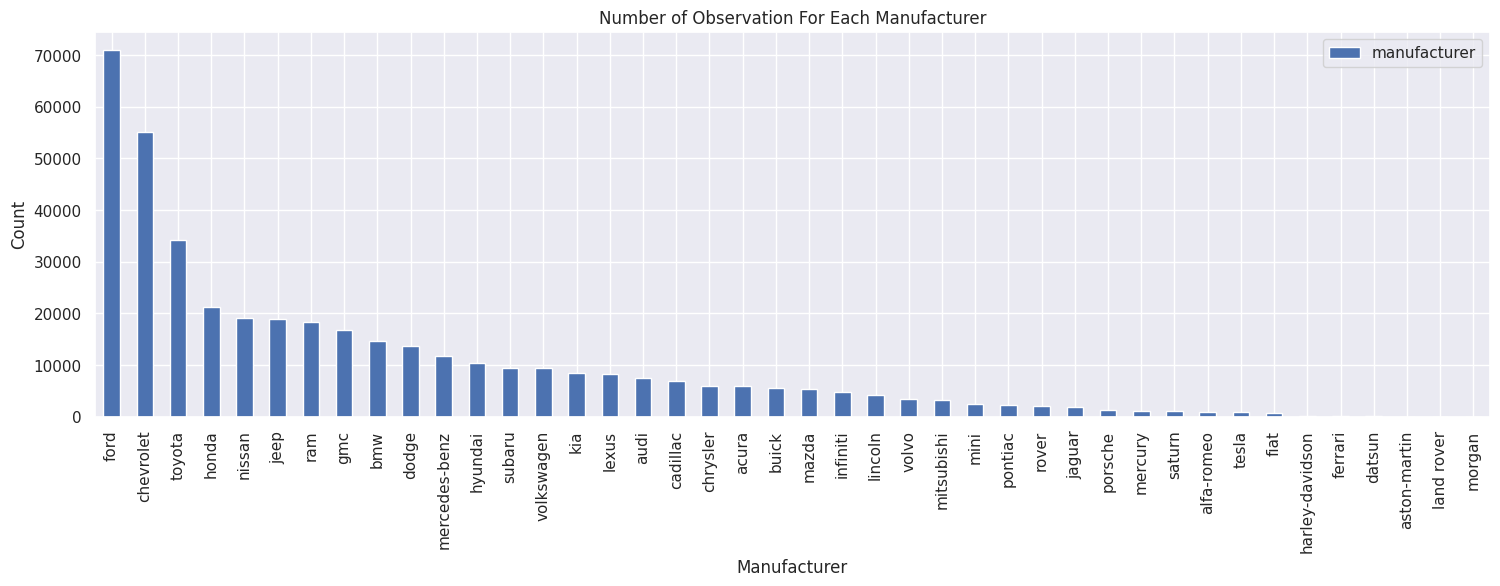

In [4]:
df.manufacturer.value_counts().reset_index().sort_values(by="manufacturer", ascending=False).plot(kind="bar", x="index", y="manufacturer")
plt.title("Number of Observation For Each Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.show()

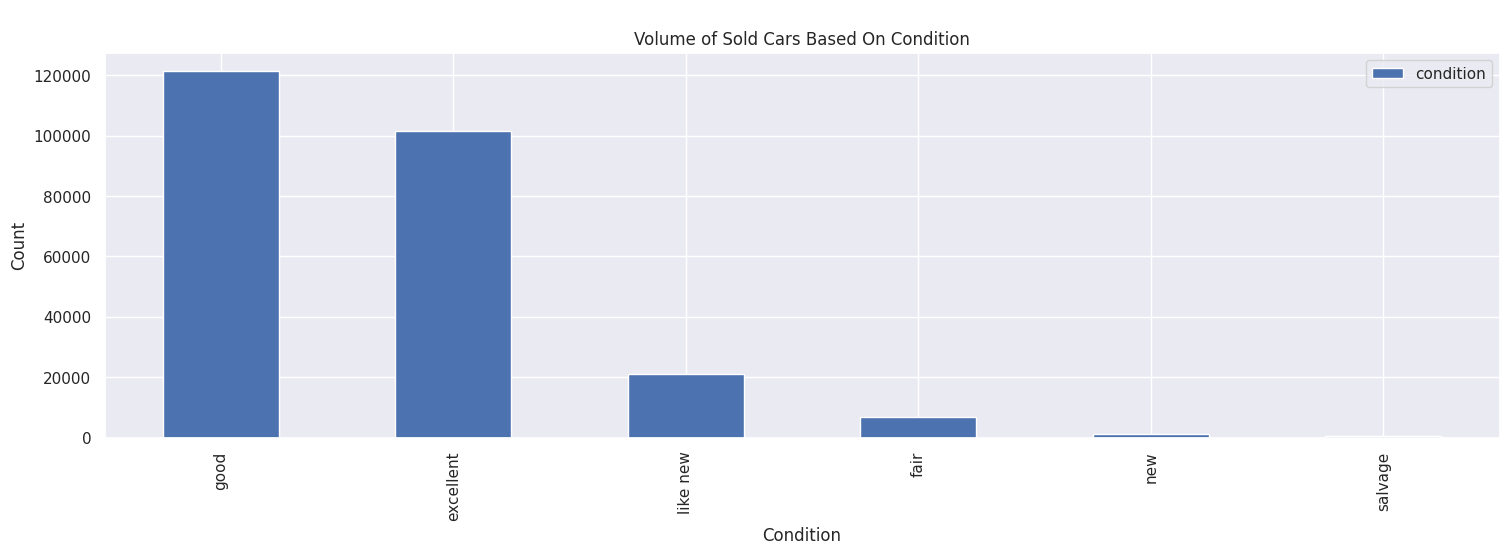

In [3]:
df.condition.value_counts().reset_index().plot(kind="bar", x="index", y="condition");
plt.title("\nVolume of Sold Cars Based On Condition")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

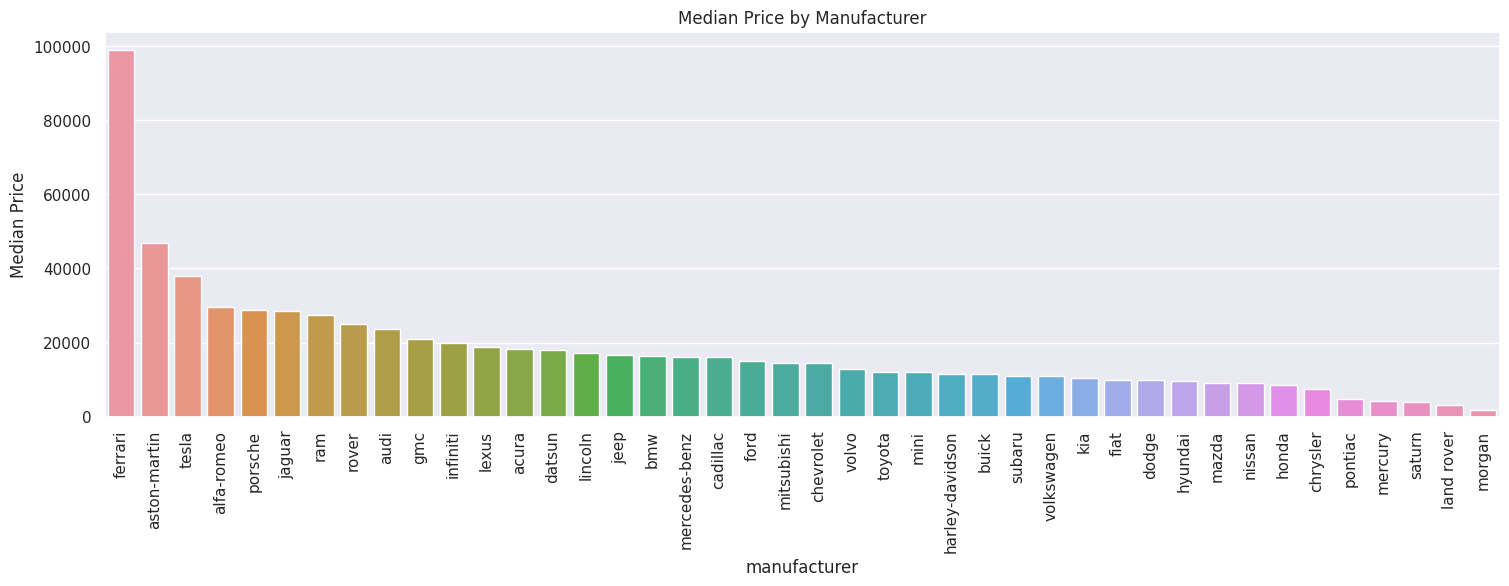

In [4]:
avg_price_by_man = df.groupby('manufacturer')['price'].median().reset_index().sort_values(by="price", ascending=False)

sns.barplot(x='manufacturer', y='price', data=avg_price_by_man)
plt.ylabel('Median Price')
plt.title('Median Price by Manufacturer')
plt.xticks(rotation=90) 
plt.show()

In [ ]:
avg_price_by_cyl = df.groupby('cylinders')['price'].median().reset_index()

sns.barplot(x='cylinders', y='price', data=avg_price_by_cyl)
plt.ylabel('Average Price')
plt.title('Average Price by #Cylinders')
plt.xticks(rotation=90) 
plt.show()


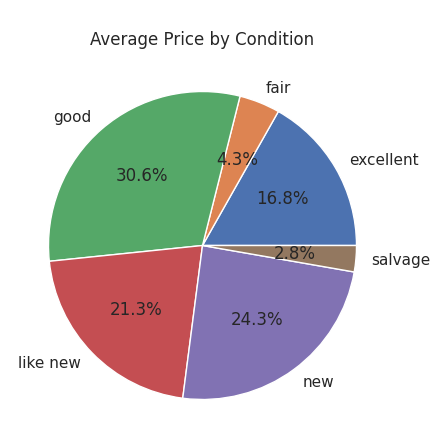

In [6]:
avg_price_by_cond = df.groupby('condition')['price'].median()

plt.pie(avg_price_by_cond, labels = avg_price_by_cond.index, autopct='%1.1f%%')
plt.title('\nAverage Price by Condition')
plt.show()

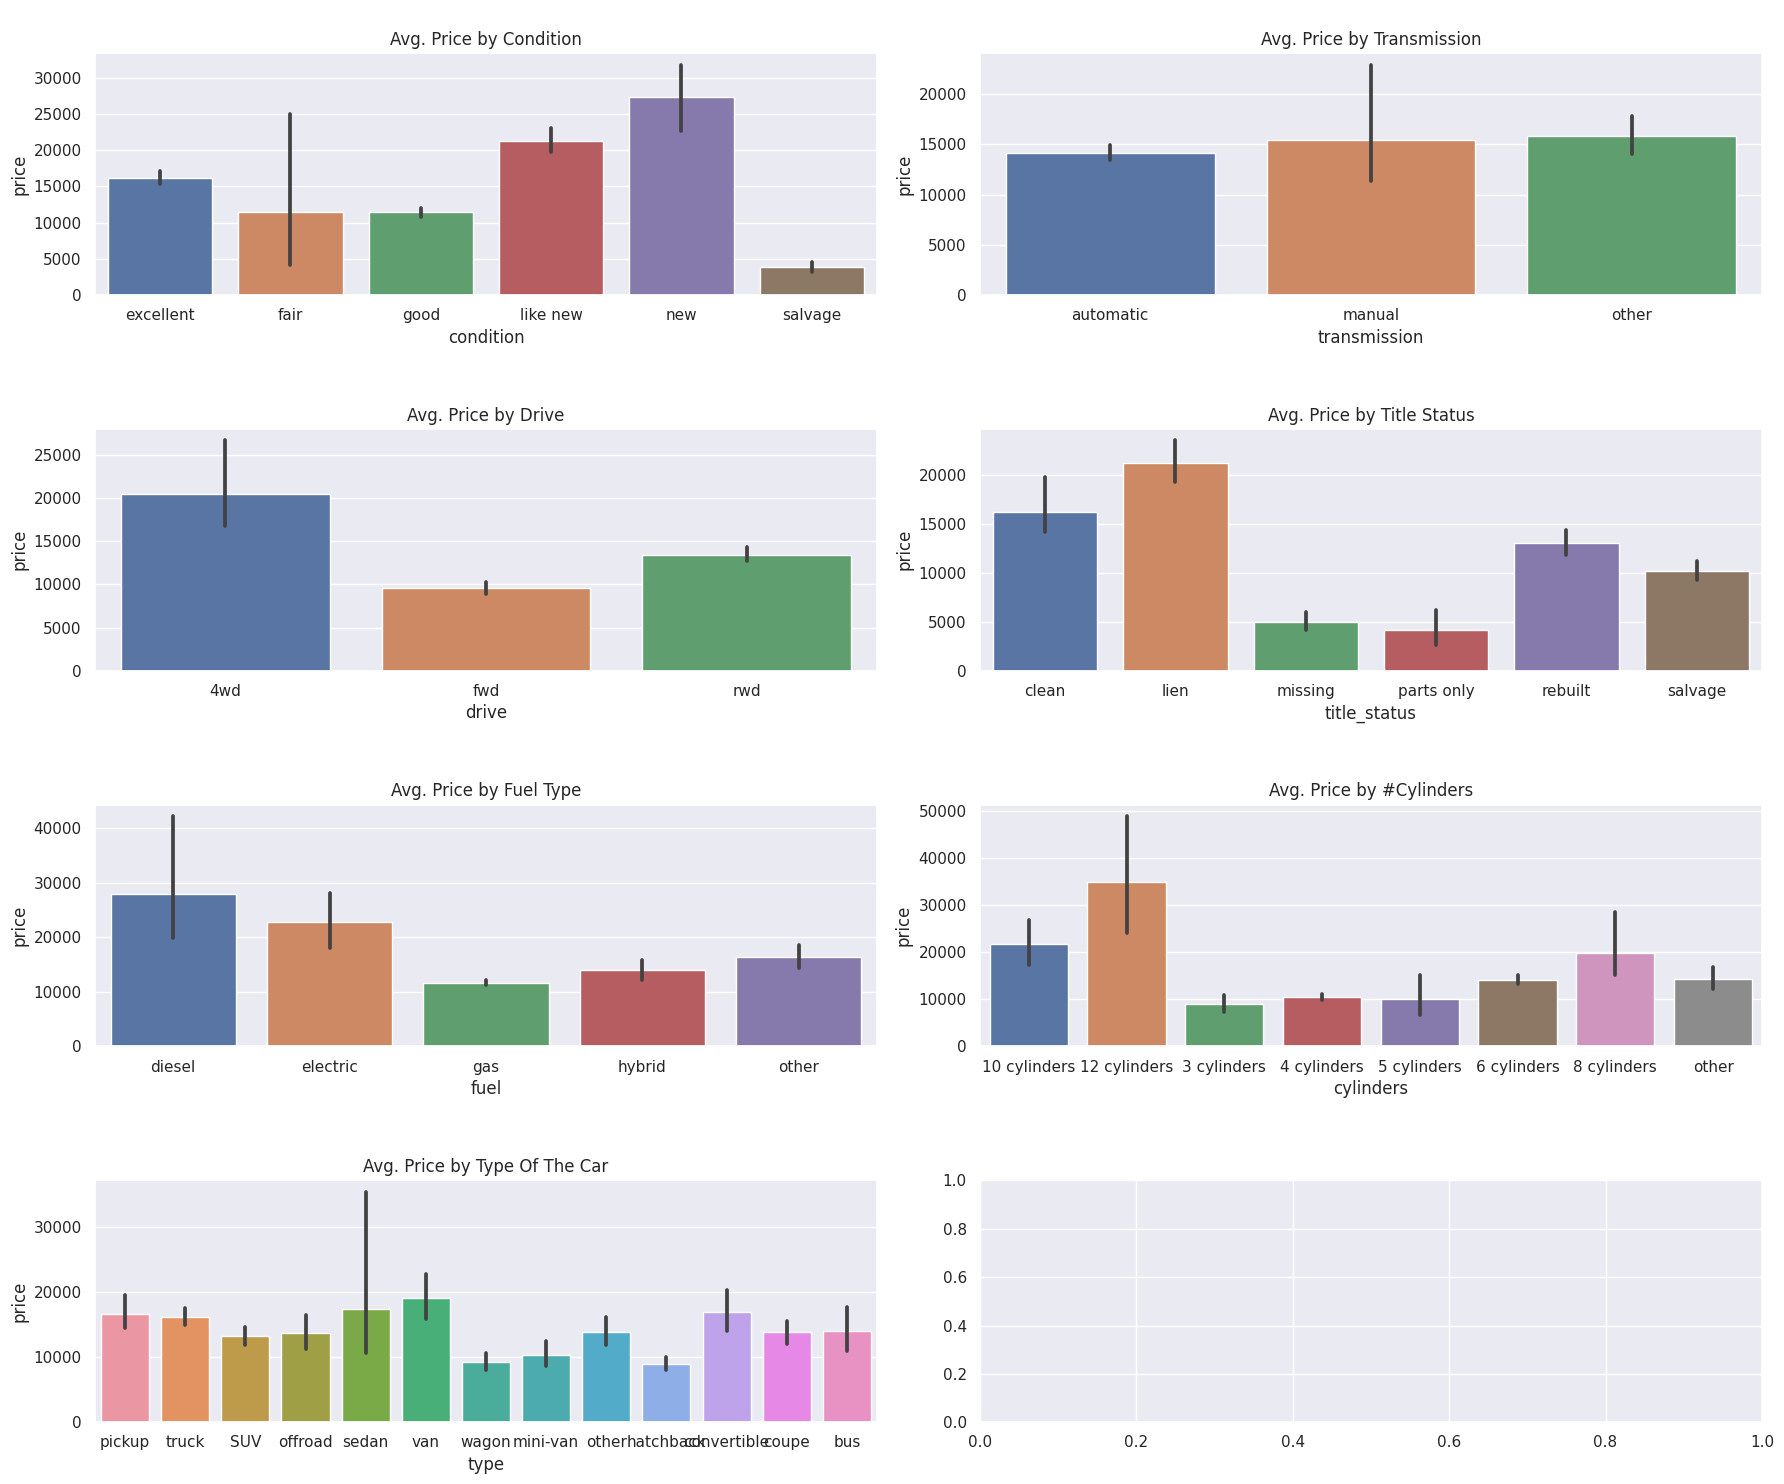

In [7]:
total_price = df.groupby(['condition', "transmission", "drive", "title_status", "fuel", "cylinders", "type"])['price'].median().reset_index()



fig, axs = plt.subplots(4, 2, figsize=(18, 15))

sns.barplot(x='condition', y='price', data=total_price, ax=axs[0, 0])
axs[0, 0].set_title('\nAvg. Price by Condition')

sns.barplot(x='transmission', y='price', data=total_price, ax=axs[0, 1])
axs[0, 1].set_title('\nAvg. Price by Transmission')


sns.barplot(x='drive', y='price', data=total_price, ax=axs[1, 0])
axs[1, 0].set_title('\n\nAvg. Price by Drive')

sns.barplot(x='title_status', y='price', data=total_price, ax=axs[1, 1])
axs[1, 1].set_title('\n\nAvg. Price by Title Status')

sns.barplot(x='fuel', y='price', data=total_price, ax=axs[2, 0])
axs[2, 0].set_title('\n\nAvg. Price by Fuel Type')

sns.barplot(x='cylinders', y='price', data=total_price, ax=axs[2, 1])
axs[2, 1].set_title('\n\nAvg. Price by #Cylinders')


sns.barplot(x='type', y='price', data=total_price, ax=axs[3, 0])
axs[3, 0].set_title('\n\nAvg. Price by Type Of The Car')

plt.tight_layout()
plt.show()

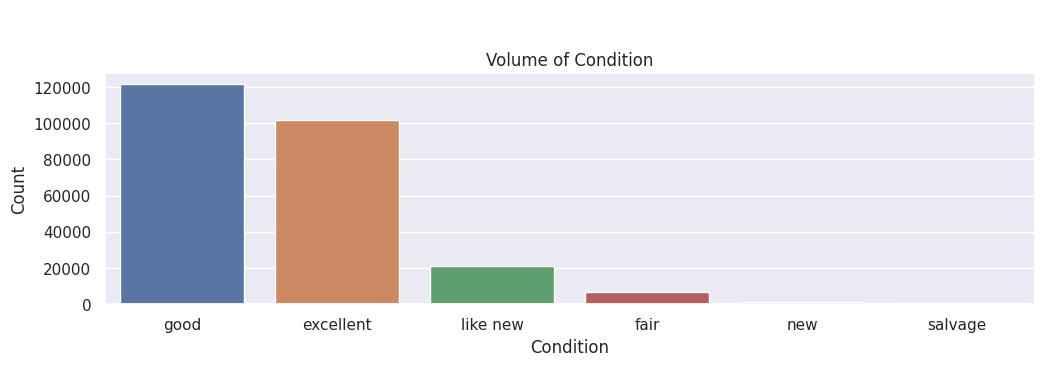

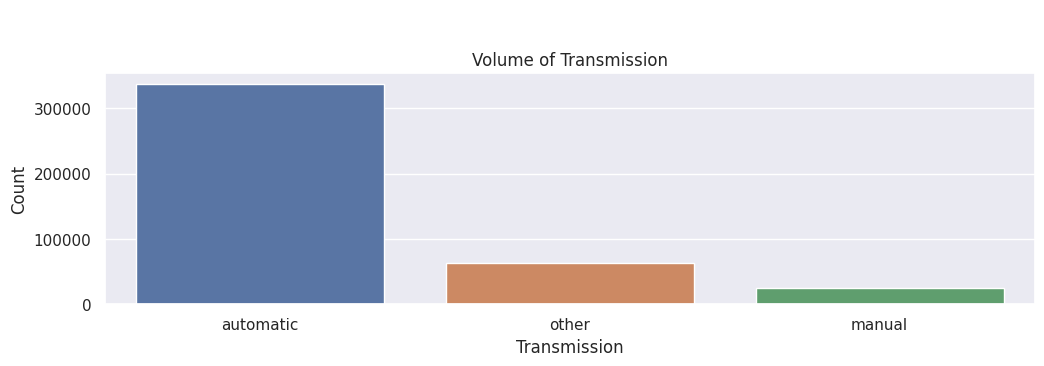

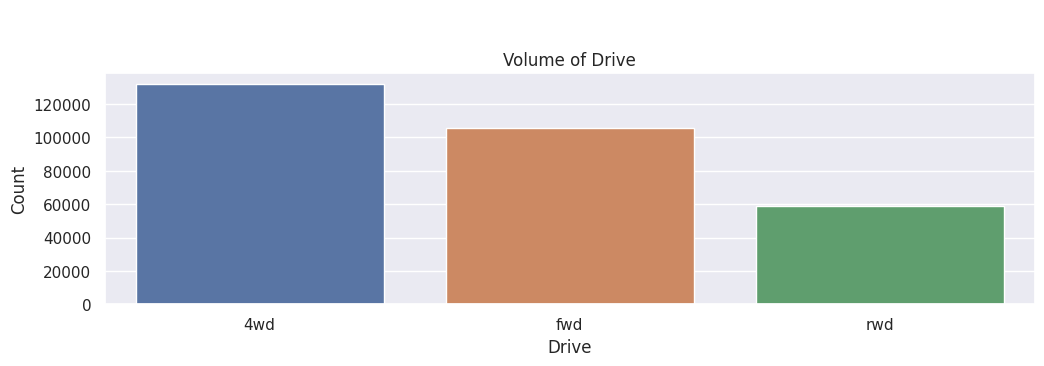

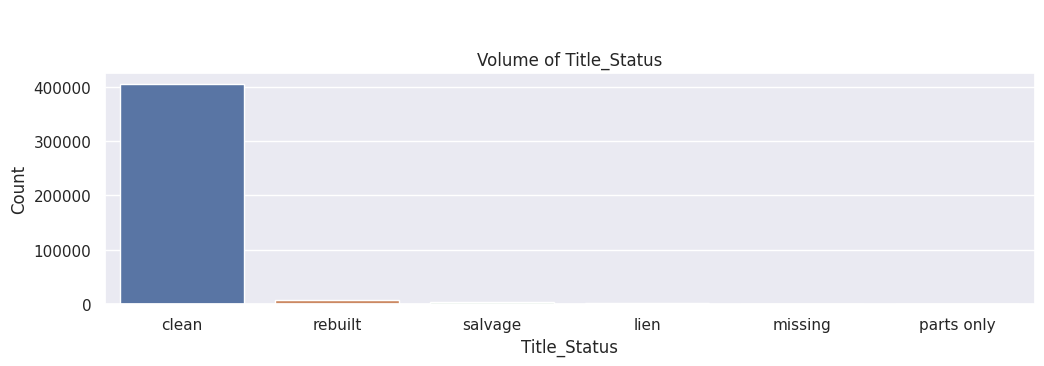

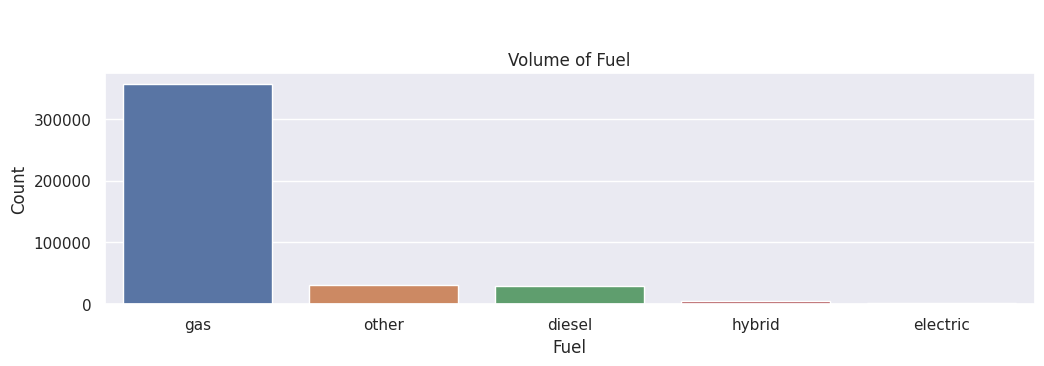

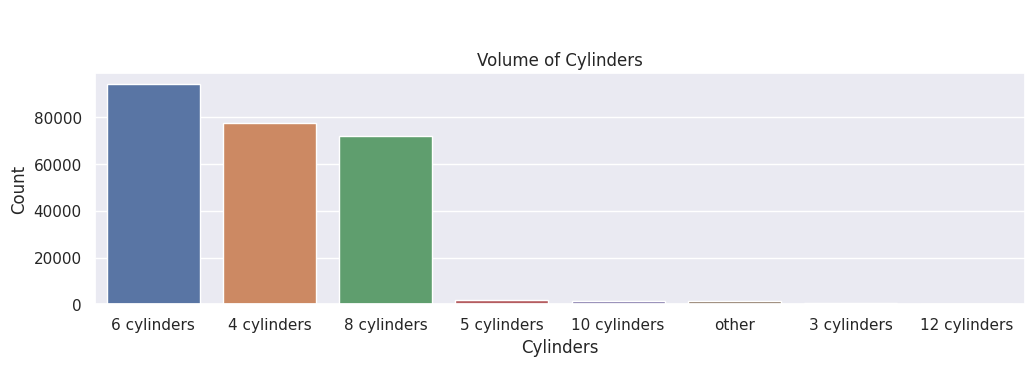

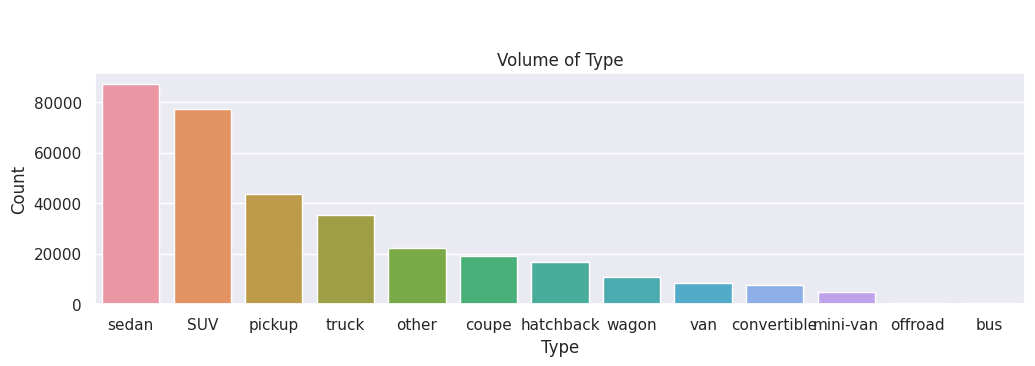

In [89]:
features = ['condition', "transmission", "drive", "title_status", "fuel", "cylinders", "type"]

for i in features:
    count = df[i].value_counts().reset_index()
    col1 = count.columns[0]
    col2 = count.columns[1]
    plt.figure(figsize=(12,3));
    fig = sns.barplot(x=col1, y=col2, data=count);
    fig.set_title(f'\n\nVolume of {i.title()}');
    plt.xlabel(f"{i.title()}");
    plt.ylabel("Count");
    plt.show();
    
    
    





### Looking at Sedan with Manufacturer

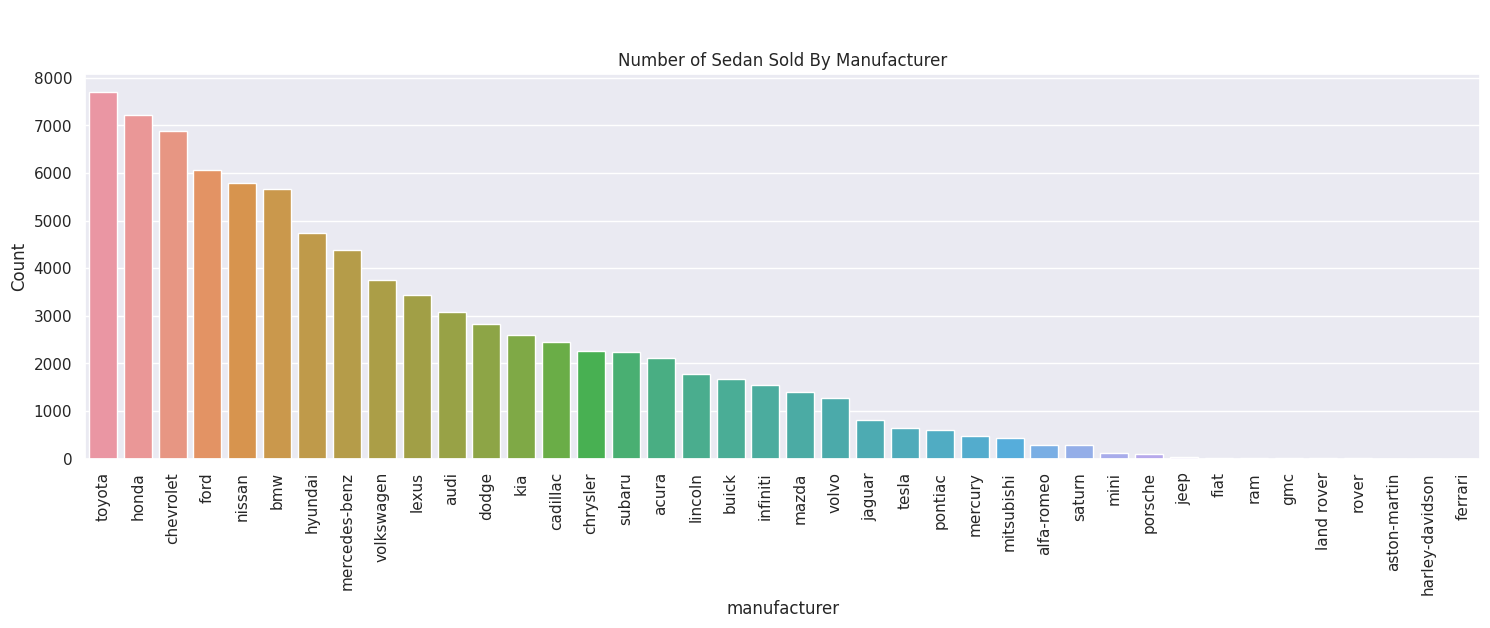

In [102]:
sedan_w_manu = df.query("type == 'sedan'")[["manufacturer"]].value_counts().reset_index()\
    .rename(columns={0: "Count"})

sns.barplot(data=sedan_w_manu, x="manufacturer", y="Count");
plt.title("\n\nNumber of Sedan Sold By Manufacturer")
plt.xticks(rotation=90);




### Finding out Sedan Sales in Each State



From below Plots, we can see the Ford Was the top Sold car in California 

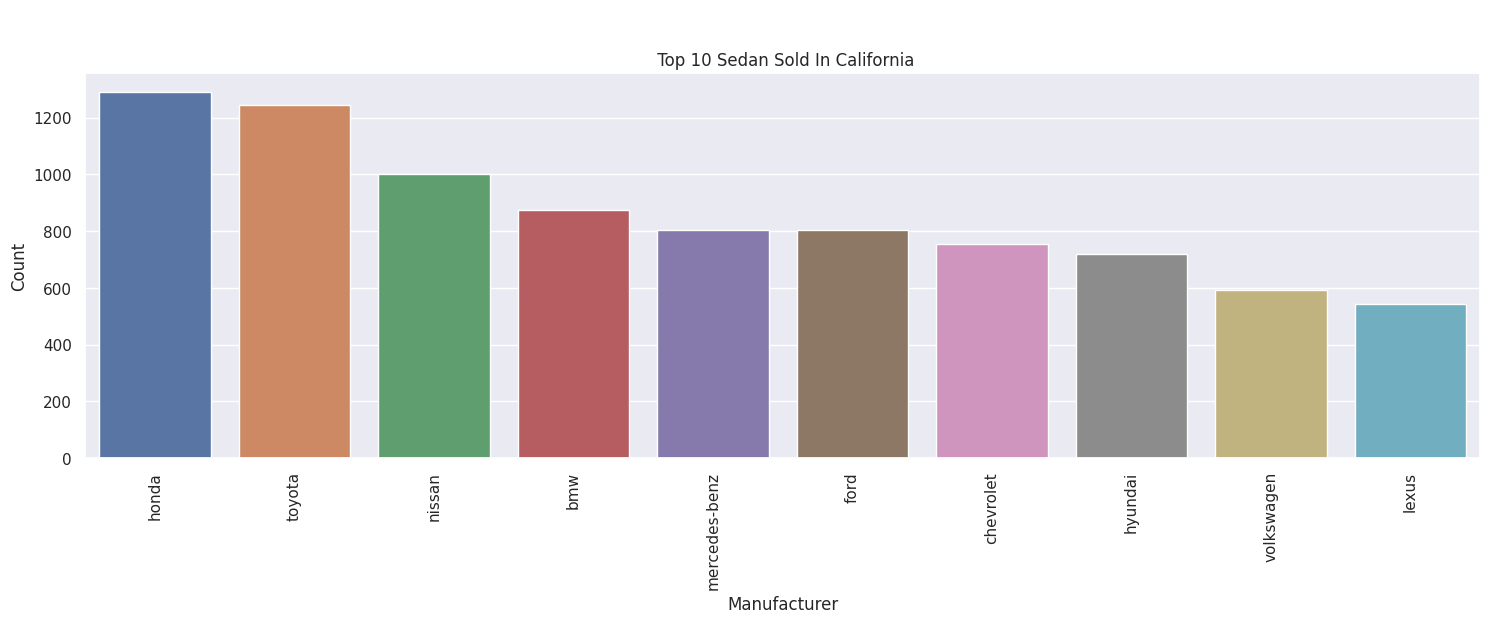

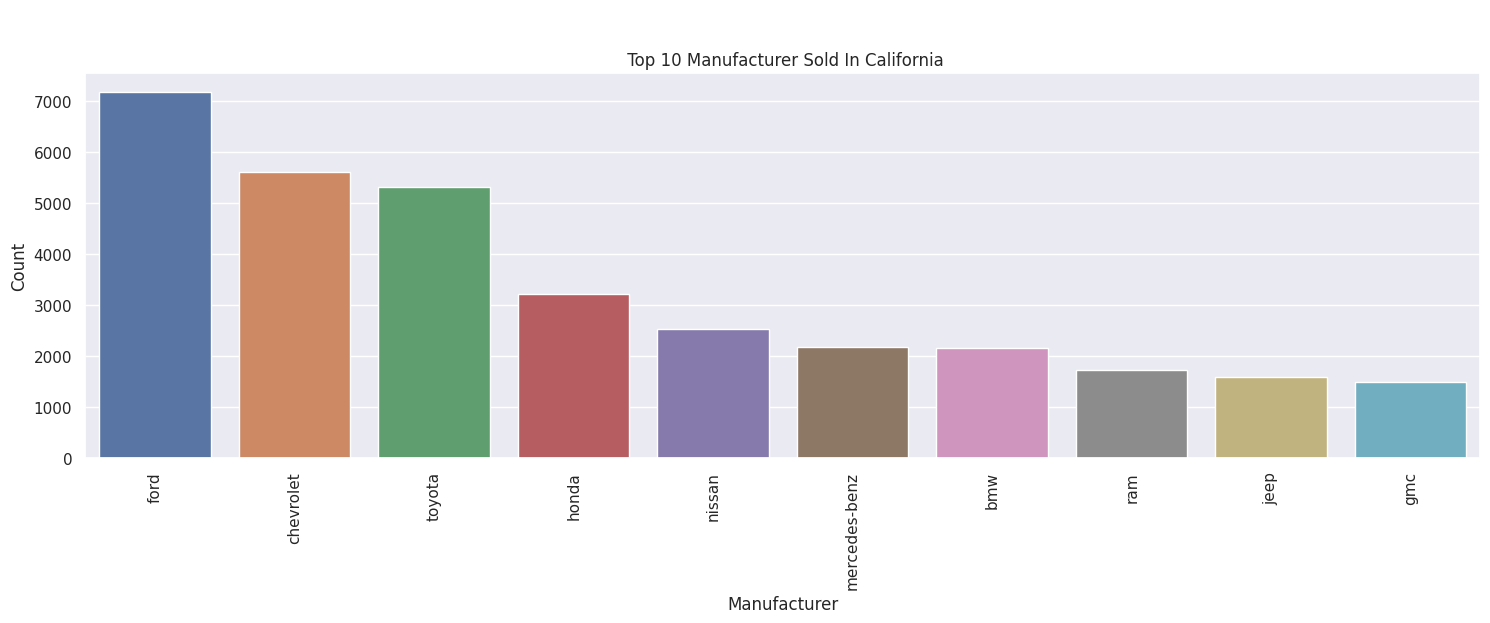

In [21]:
sedan_in_ca = df.query("type == 'sedan'  & state == 'ca'")["manufacturer"].value_counts().reset_index().iloc[:10,:]
all_man_in_ca = df.query("state == 'ca'")["manufacturer"].value_counts().reset_index().iloc[:10,:]


sns.barplot(data=sedan_in_ca, x="index", y="manufacturer")

plt.title("\n\n Top 10 Sedan Sold In California")
plt.xlabel("Manufacturer");
plt.ylabel("Count");
plt.xticks(rotation=90);

plt.show()

sns.barplot(data=all_man_in_ca, x="index", y="manufacturer")

plt.title("\n\n Top 10 Manufacturer Sold In California")
plt.xlabel("Manufacturer");
plt.ylabel("Count");
plt.xticks(rotation=90);

plt.show()

## Finding out the Count for SUV and Pickup Model

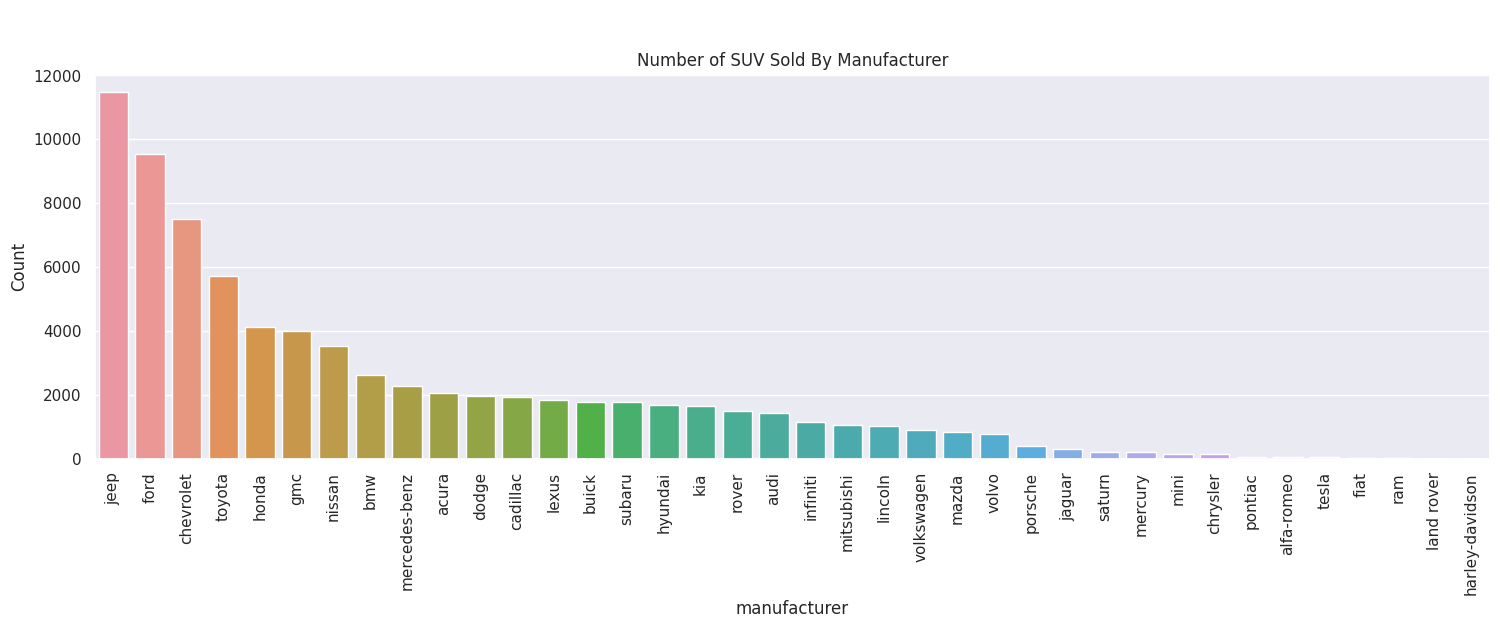

In [100]:
suv_w_manu = df.query("type == 'SUV'")[["manufacturer"]].value_counts().reset_index()\
    .rename(columns={0: "Count"})

sns.barplot(data=suv_w_manu, x="manufacturer", y="Count");
plt.title("\n\nNumber of SUV Sold By Manufacturer")
plt.xticks(rotation=90);


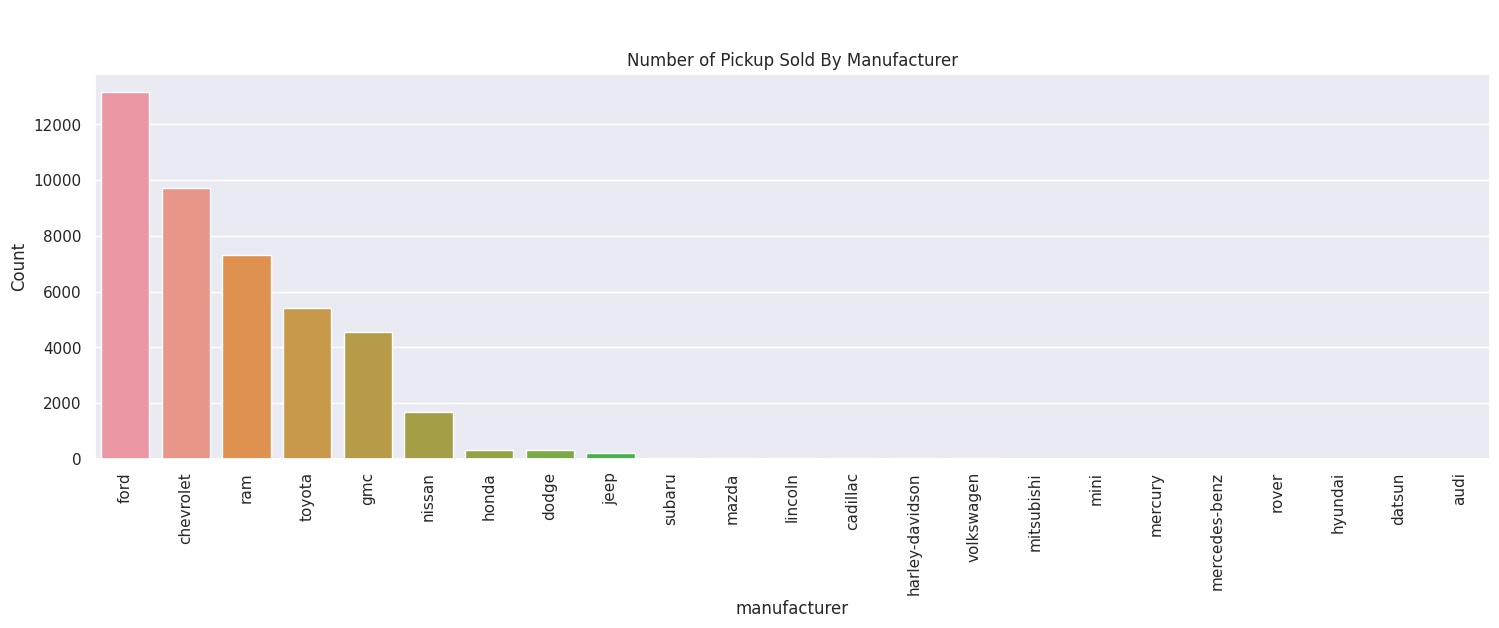

In [101]:

pickup_w_manu = df.query("type == 'pickup'")[["manufacturer"]].value_counts().reset_index()\
    .rename(columns={0: "Count"})

sns.barplot(data=pickup_w_manu, x="manufacturer", y="Count");
plt.title("\n\nNumber of Pickup Sold By Manufacturer")
plt.xticks(rotation=90);

In [131]:
df.groupby("manufacturer")["price"].mean().reset_index().sort_values(by="price", ascending=False).head()

,manufacturer,price
26,mercedes-benz,600575.765246
41,volvo,394993.858755
39,toyota,253586.921994
20,jeep,164122.823607
11,ferrari,126008.395062


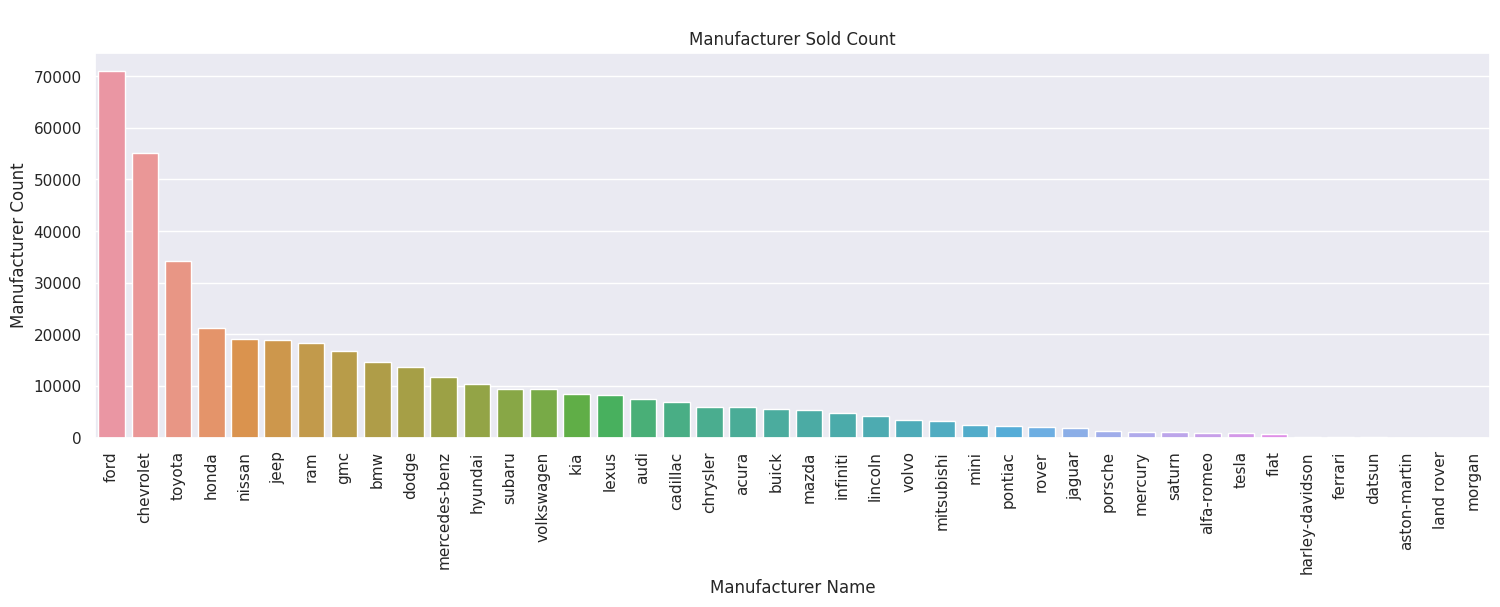

In [9]:
manufacturer_count = df.manufacturer.value_counts().reset_index().rename(columns={"index": "manufacturer", "manufacturer":"count"})

fig = sns.barplot(data=manufacturer_count, x="manufacturer", y="count");
fig.set_title("\nManufacturer Sold Count")
fig.set_ylabel("Manufacturer Count")
fig.set_xlabel("Manufacturer Name")
plt.xticks(rotation=90)

# for i in fig.patches:
#     fig.annotate(i.get_height(), 
#                  (i.get_x() + i.get_width() / 2., i.get_height()),
#                  ha = 'center', 
#                  # va = 'center', 
#                  xytext = (0, 1), 
#                  textcoords = 'offset points',
#                  rotation=90
#                 )
plt.show()

#### Finding out What is Most Sold Car in Each State

In [137]:
# top car that was sold in each State was Ford

man_per_state = df.groupby("state")["manufacturer"].describe().reset_index().sort_values(by="freq", ascending=False)
man_per_state.state = man_per_state.state.str.upper()
man_per_state.top = man_per_state.top.str.upper()
man_per_state.head()

,state,count,unique,top,freq
4,CA,48559,41,FORD,7189
9,FL,27146,40,FORD,5033
43,TX,21926,39,FORD,4456
22,MI,16393,40,FORD,3753
37,OR,16743,40,FORD,3470


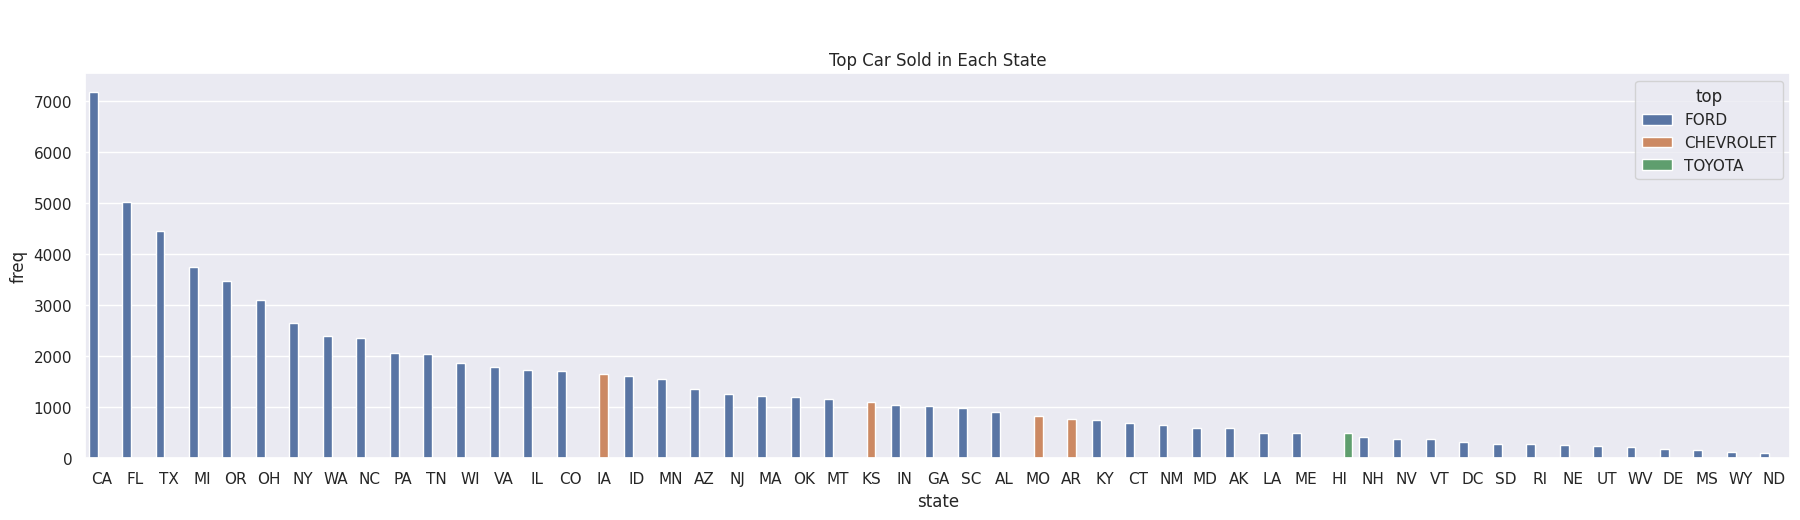

In [141]:
plt.figure(figsize=(22, 5))
sns.barplot(man_per_state, x="state", y="freq", hue="top");
plt.title("\n\nTop Car Sold in Each State");

In [28]:

man_price_in_ca = df.query("state == 'ca'").groupby("manufacturer")["price"]\
.median().reset_index().sort_values(by="price", ascending=False)
man_in_ca

,manufacturer,price
11,ferrari,105000.0
37,tesla,36999.0
1,alfa-romeo,29990.0
33,ram,25990.0
34,rover,25743.5
32,porsche,25250.0
40,volvo,23990.0
19,jaguar,21590.0
2,aston-martin,20000.0
3,audi,19992.5


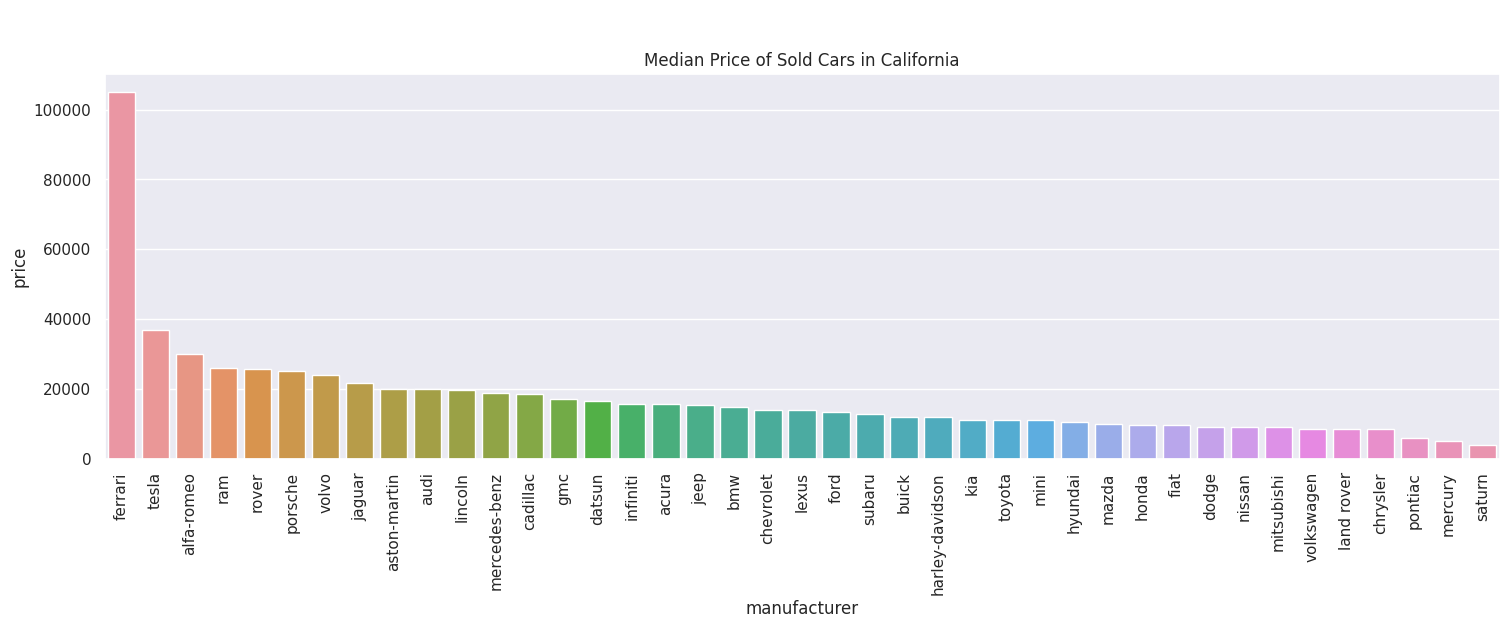

In [29]:
sns.barplot(data=man_price_in_ca, x="manufacturer", y="price");
plt.xticks(rotation=90);
plt.title("\n\nMedian Price of Sold Cars in California");

### Top 10 Cars Sold in California

In [93]:


man_count_in_ca = df.query("state == 'ca'")['manufacturer'].value_counts()\
                .reset_index().rename(columns={"index": "Manufacturer", "manufacturer": "Count"})


In [94]:
man_count_in_ca.Manufacturer = man_count_in_ca.Manufacturer.str.title()

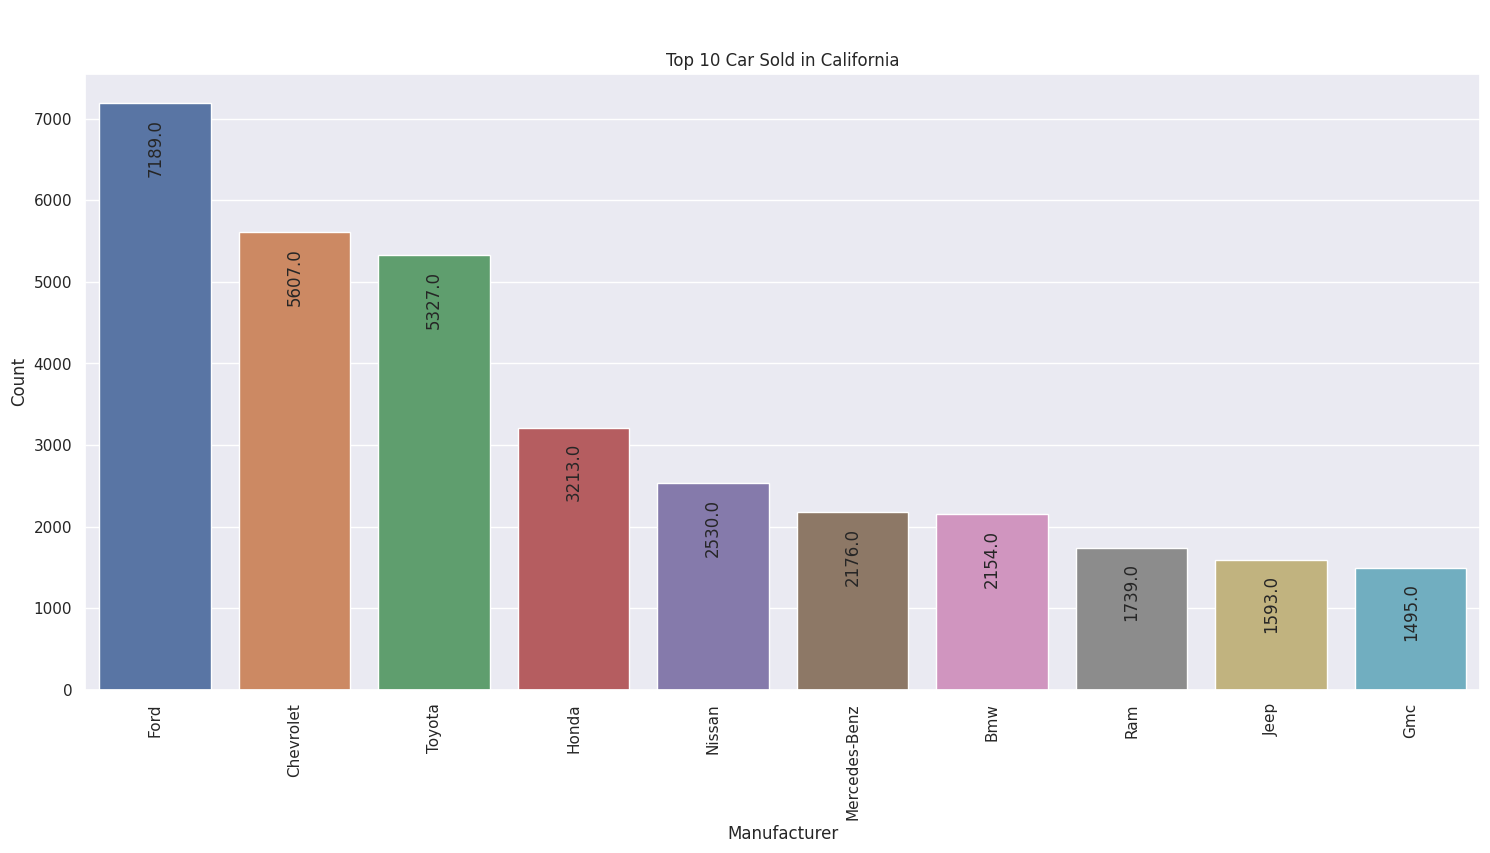

In [95]:
plt.figure(figsize=(18, 8))

fig = sns.barplot(data=man_count_in_ca.iloc[:10, :], x="Manufacturer", y="Count");
plt.xticks(rotation=90);
plt.title("\n\nTop 10 Car Sold in California");


for i in fig.patches:
    fig.annotate(i.get_height(), 
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', 
                 # va = 'center', 
                 xytext = (0, -50), 
                 textcoords = 'offset points',
                 rotation=90
                )

### Checking some details about the Top 10 Cars 

Checking Ford Details in California

In [96]:

ford_model_ca = df.query("manufacturer == 'ford' & state == 'ca'")["model"].value_counts()\
            .reset_index().rename(columns={"index":"Model", "model":"Count"})
ford_model_ca.Model = ford_model_ca.Model.str.title()
ford_model_ca

,Model,Count
0,F-150,583
1,Fusion,252
2,Mustang,238
3,Focus,187
4,Escape,182
...,...,...
987,Falcon Ranchero,1
988,Taurus Lx,1
989,F450 Deisel Powerstroke,1
990,Edge Sel Eco-Boost,1


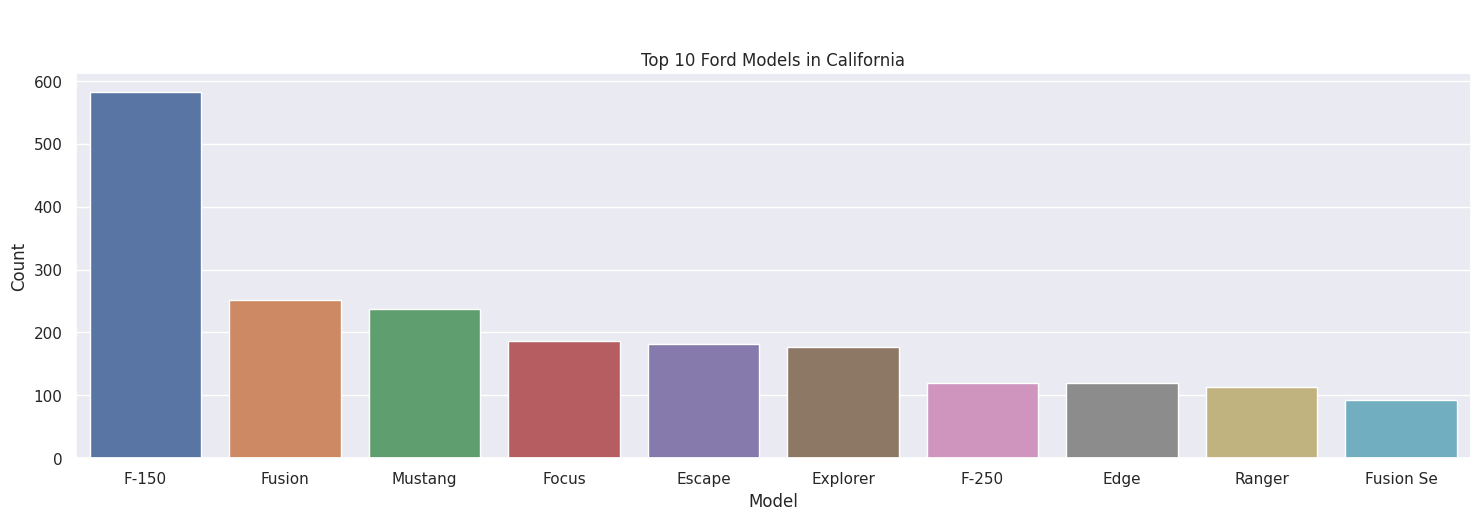

In [97]:
sns.barplot(data=ford_model_ca.iloc[:10, :], x="Model", y="Count");
plt.title("\n\nTop 10 Ford Models in California"); 

In [98]:

ford_model_price_ca = df.query("manufacturer == 'ford' & state == 'ca'")\
    .groupby("model")["price"].median().reset_index()\
    .sort_values(by="price", ascending=False)
ford_model_price_ca

,model,price
262,f 150 raptor shelby baja,109950.0
802,mustang shelby gt500,99000.0
869,super duty f-250 pickup,94470.0
409,f-350 f350 f-350 super duty,93995.0
410,f-350 f350 super duty platinum loaded lifted 37s,93995.0
...,...,...
929,transit 250 lr,0.0
425,f-350 super duty lariat li,0.0
426,f-350 super duty lariat lo,0.0
427,f-350 super duty long bed,0.0


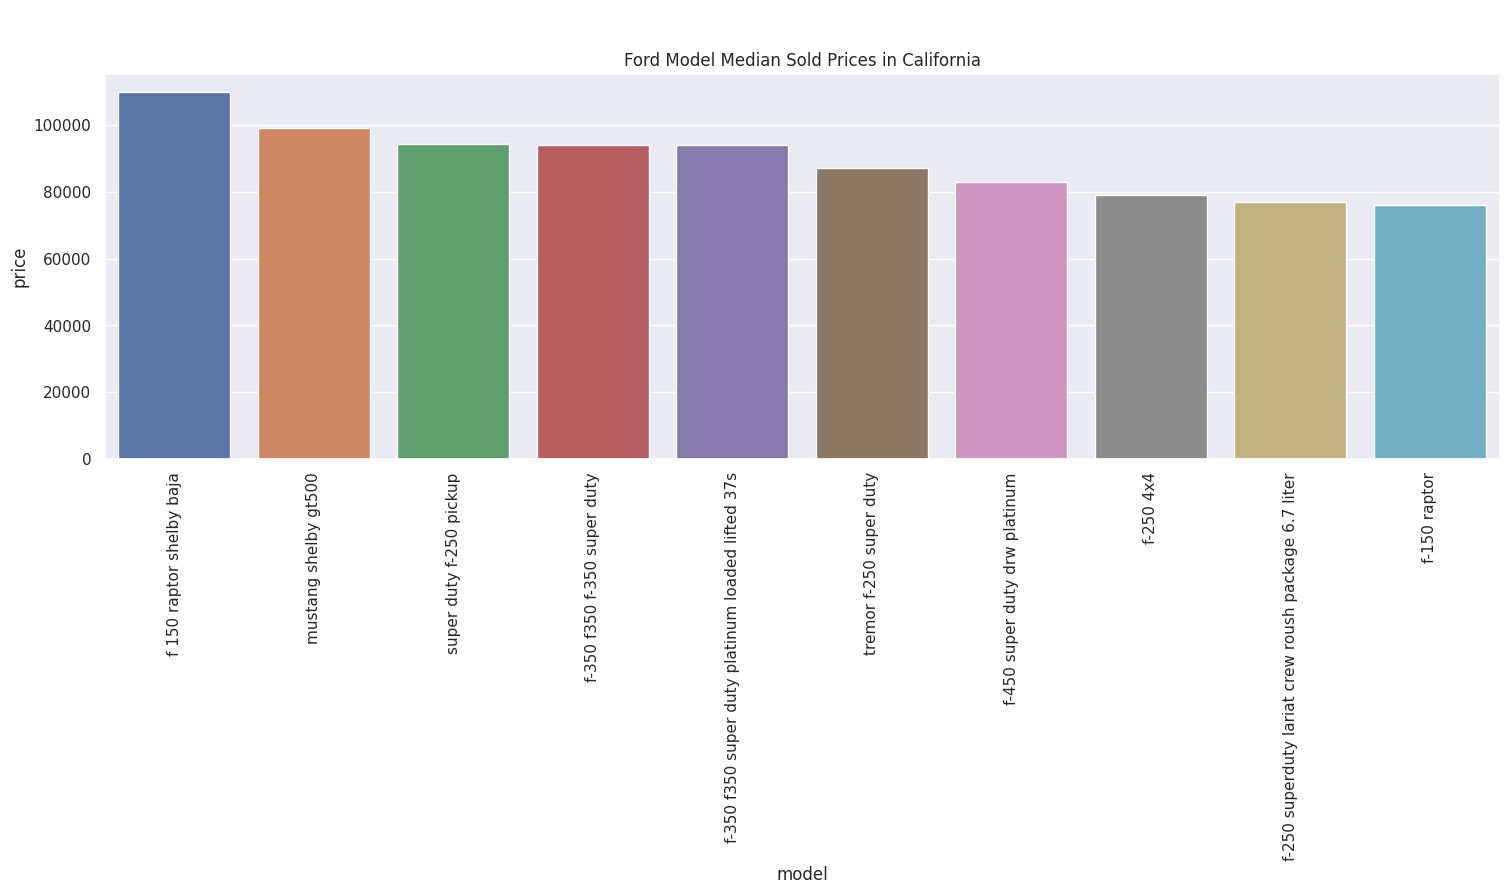

In [99]:
sns.barplot(data=ford_model_price_ca.iloc[:10, :], x="model", y="price");
plt.xticks(rotation=90);
plt.title("\n\nFord Model Median Sold Prices in California");

### Top 10 Cars Sold in Florida

In [95]:


man_count_in_ca = df.query("state == 'fl'")['manufacturer'].value_counts()\
                .reset_index().rename(columns={"index": "Manufacturer", "manufacturer": "Count"})


In [96]:
man_count_in_ca.Manufacturer = man_count_in_ca.Manufacturer.str.title()

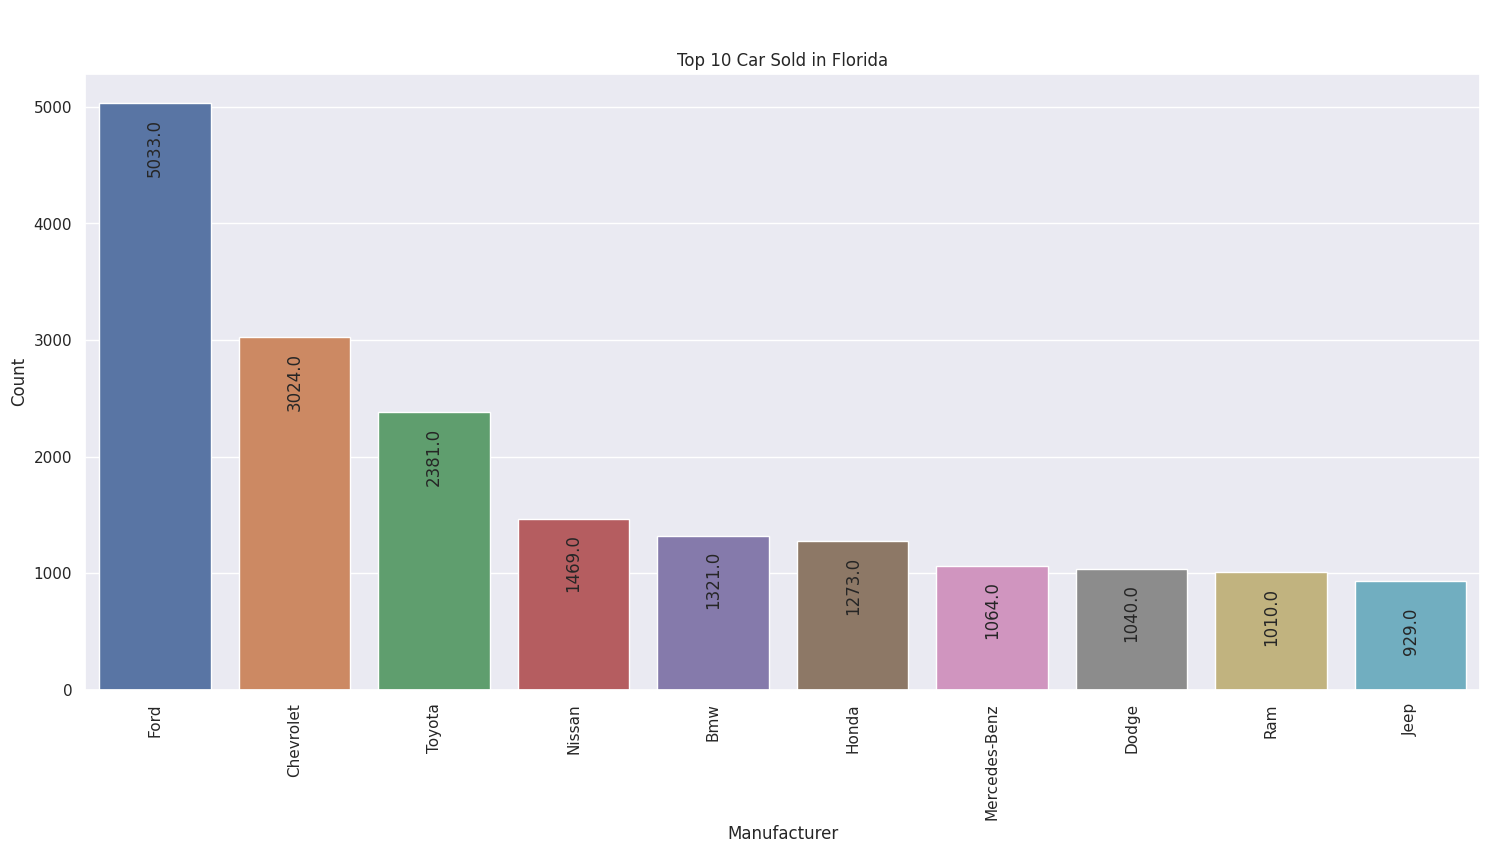

In [97]:
plt.figure(figsize=(18, 8))

fig = sns.barplot(data=man_count_in_ca.iloc[:10, :], x="Manufacturer", y="Count");
plt.xticks(rotation=90);
plt.title("\n\nTop 10 Car Sold in Florida");


for i in fig.patches:
    fig.annotate(i.get_height(), 
                 (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha = 'center', 
                 # va = 'center', 
                 xytext = (0, -50), 
                 textcoords = 'offset points',
                 rotation=90
                )

### Checking some details about the Top 10 Cars 

Checking Ford Details in California

In [112]:

ford_model_fl = df.query("manufacturer == 'ford' & state == 'fl'")["model"].value_counts()\
            .reset_index().rename(columns={"index":"Model", "model":"Count"})
ford_model_fl.Model = ford_model_fl.Model.str.title()
ford_model_fl

,Model,Count
0,F-150,611
1,F-250,198
2,Escape,178
3,Mustang,175
4,F-350,134
...,...,...
630,F350 Diesel Powerstroke Xlt,1
631,F-650 Diesel,1
632,Taurus Limited Sedan 4D,1
633,F250 6.4L Diesel 4X4,1


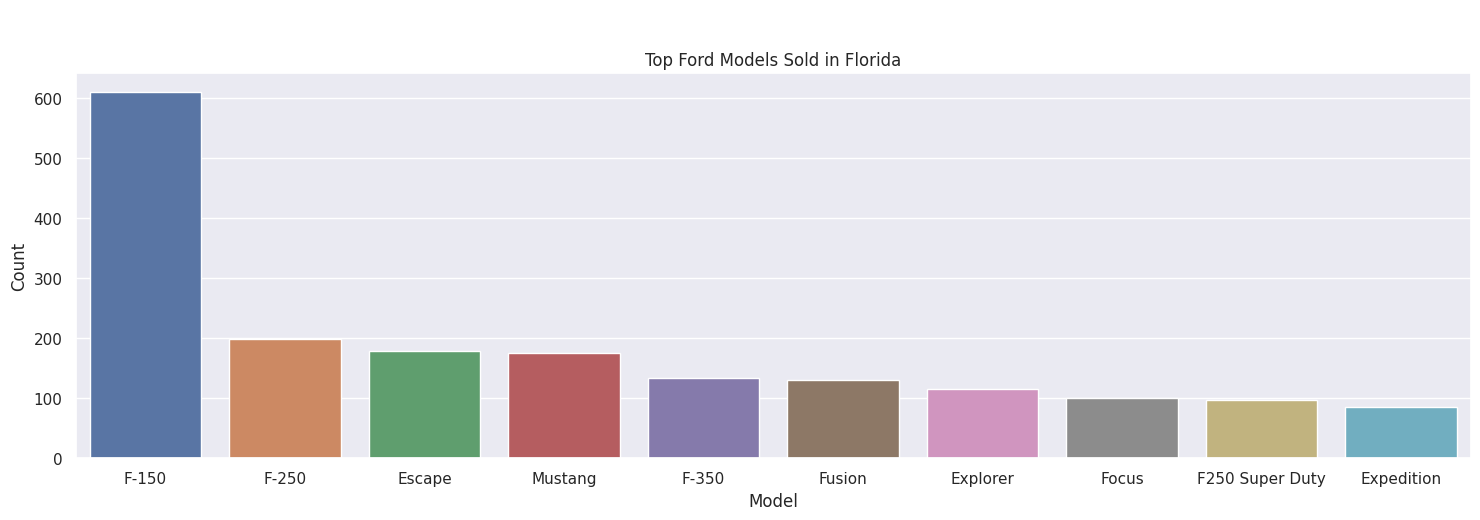

In [113]:
sns.barplot(data=ford_model_fl.iloc[:10, :], x="Model", y="Count");
plt.title("\n\nTop Ford Models Sold in Florida"); 

In [100]:

ford_model_price_fl = df.query("manufacturer == 'ford' & state == 'fl'")\
    .groupby("model")["price"].median().reset_index()\
    .sort_values(by="price", ascending=False)
ford_model_price_fl

,model,price
526,mustang shelby gt500,91700.0
179,f 250 lariat fx4,89995.0
181,f 250 platinum fx4,84995.0
573,super duty f250,84345.0
186,f 350 lariat fx4 dually,76495.0
...,...,...
560,special deluxe,0.0
148,expedition xlt automatic,0.0
216,f-150 supercab 4x4,0.0
203,f-150 lariat 4wd supercrew automatic,0.0


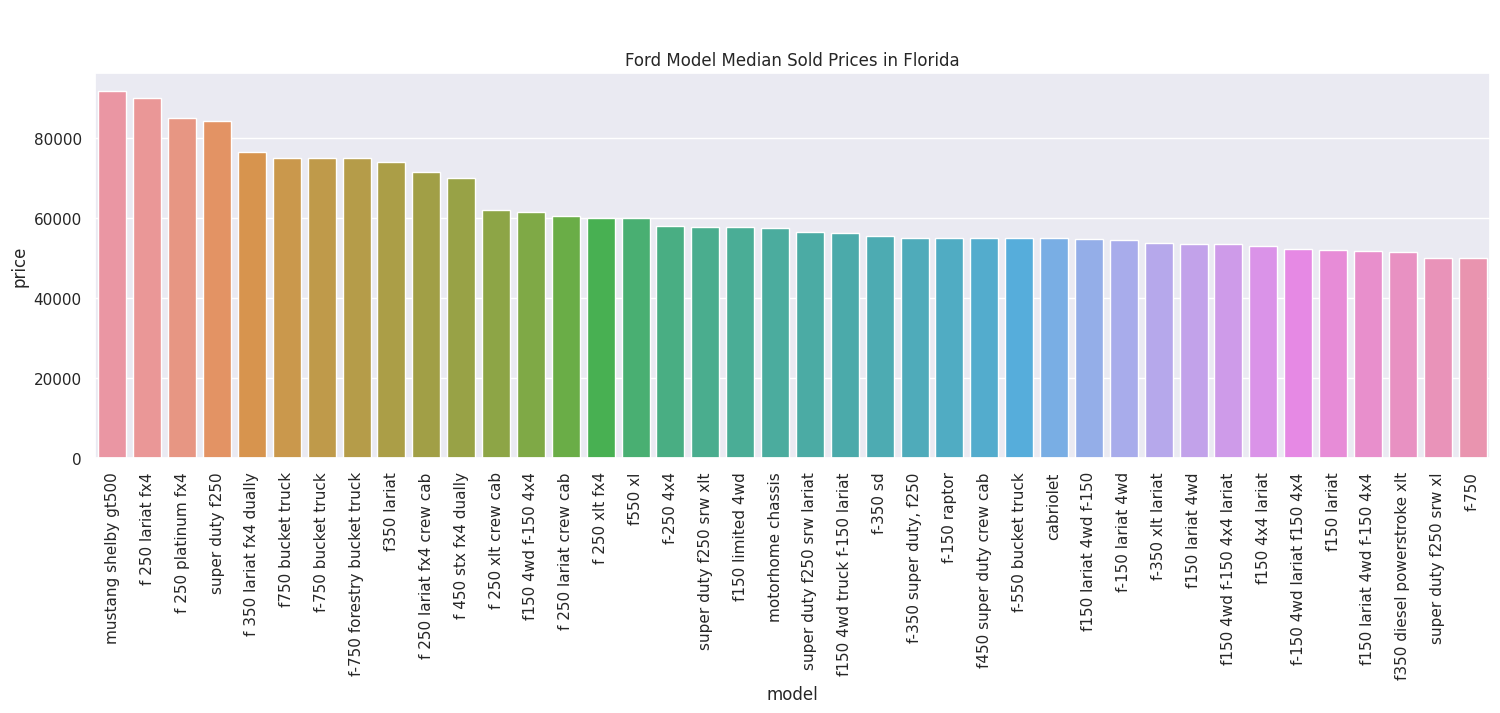

In [104]:
sns.barplot(data=ford_model_price_fl.iloc[:40, :], x="model", y="price");
plt.xticks(rotation=90);
plt.title("\n\nFord Model Median Sold Prices in Florida");

#### From both California and Florida plots above, we can see F-150 Ford is sold the most. 
next we will look at the F-15 Model in details 


In [133]:
ford_model = df.groupby("manufacturer")[["model"]].value_counts()[["ford"]].reset_index()\
    .rename(columns={0: "Count"})
ford_model.head()

ford_model.model = ford_model.model.str.title()

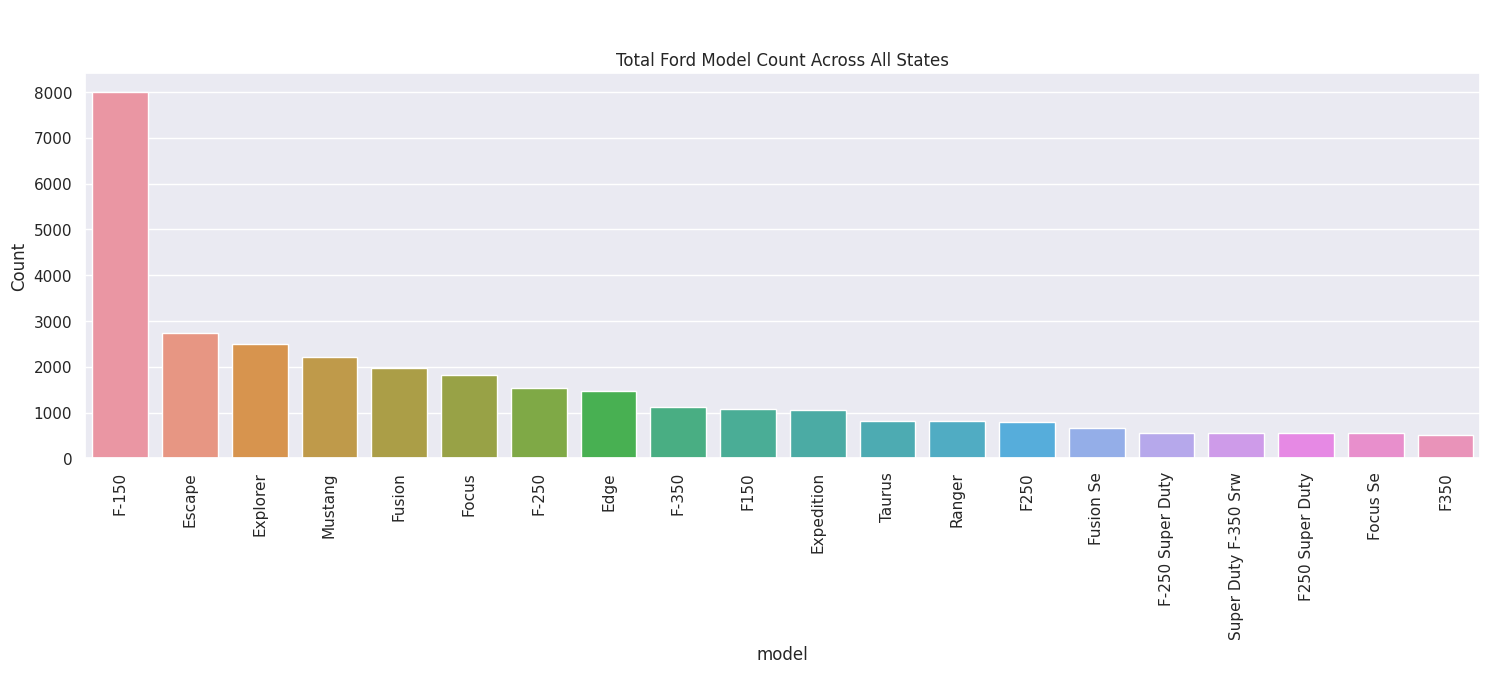

In [135]:
sns.barplot(data=ford_model.iloc[:20, :], x="model", y="Count");
plt.xticks(rotation=90);
plt.title("\n\nTotal Ford Model Count Across All States");

 Above shows Ford F-150 is the most sold car in all the states 
 
 <hr>

## Finding out the Age of the Cars and Top Sales 

Below Bar Plot

In [154]:
top_10_man_year = df.groupby("year")[["manufacturer"]].value_counts().reset_index().sort_values(by=0, ascending=False).iloc[:20, :]

top_10_man_year.rename(columns={0: "Count"}, inplace=True)


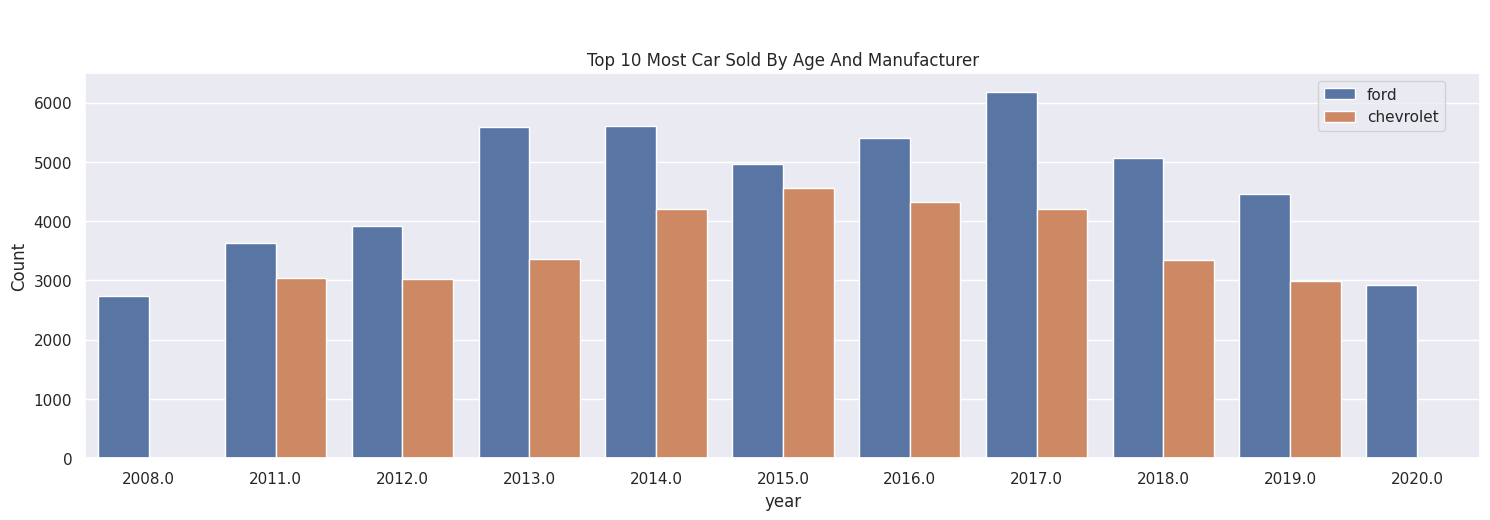

In [162]:
sns.barplot(data=top_10_man_year, x="year", y="Count", hue="manufacturer");
plt.title("\n\nTop 10 Most Car Sold By Age And Manufacturer")

legend = plt.legend()

new_position = (0.98, 1)  # (x, y) coordinates between 0 and 1

# Move the legend to the new position
legend.set_bbox_to_anchor(new_position)


- So Far, we Found out the top Car Sold in Each State was Ford F-150. and the year that customers were more interested was 2013 to 2017
- We can Advise the Used Car Dealerships to get Ford F-150 from 2013 to 2017/2018 for Pickup Type. and Also Honda and Toyota for Sedan Customers 
- Since we dont have the Demographic of the customers in past, we wont be able to use Classification Models to advise the Dealership of what kind of car to market 
- We can only predict prices based on the data that was provided in the dataset

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [137]:
df_copy = df.copy()

In [138]:
# Dropping the Outliers in the Price Column

df_copy = df_copy.query("1000 < price < 60_000").copy()

In [139]:
df_copy.odometer.describe()

count    3.710190e+05
mean     9.904057e+04
std      1.852568e+05
min      0.000000e+00
25%      3.955500e+04
50%      8.900000e+04
75%      1.368820e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [140]:
# Dropping the Outliers in the Odometer Column

df_copy = df_copy.query("1_000 < odometer < 300_000").copy()

In [141]:
df_copy.transmission.value_counts()

automatic    279615
other         59263
manual        20778
Name: transmission, dtype: int64

In [106]:
df_copy.cylinders.value_counts()

6 cylinders     91278
4 cylinders     75387
8 cylinders     69328
5 cylinders      1657
10 cylinders     1389
other            1111
3 cylinders       589
12 cylinders      193
Name: cylinders, dtype: int64

In [142]:
# Converting the Cylinder columns to numerical and replacing the 'other' with 0 since this will be applied to electric cars

df_copy["cylinders"] = df_copy["cylinders"].str.replace("cylinders", "")
df_copy["cylinders"] = df_copy["cylinders"].str.strip()
df_copy["cylinders"] = df_copy["cylinders"].str.replace("other", "0")


In [143]:
# Converting the cylinders of electric cars to 0 

df_copy.loc[df_copy["fuel"] == "electric", "cylinders"] = df_copy.loc[df_copy["fuel"] == "electric", "cylinders"].fillna("0")

In [144]:
df_copy.cylinders.value_counts()

6     82575
4     67873
8     60755
0      2004
5      1577
10     1068
3       522
12      127
Name: cylinders, dtype: int64

In [145]:
df_copy.transmission.value_counts()

automatic    279615
other         59263
manual        20778
Name: transmission, dtype: int64

In [146]:
df_copy.loc[df_copy["fuel"] == "electric", "transmission"] = df_copy.loc[df_copy["fuel"] == "electric", "transmission"].str.replace("automatic", "other")

In [147]:
# Dropping Rows that have more than 11 columns as NaN


df_copy.drop(df_copy[df_copy.isna().sum(axis=1) > 11].index, inplace=True)

In [148]:
df_copy.shape

(361060, 18)

In [149]:
df_copy.drop(columns="id", inplace=True)

In [150]:
df_copy.duplicated().value_counts()

False    317908
True      43152
dtype: int64

In [151]:
df_copy.drop_duplicates(inplace=True)

In [152]:
df_copy.shape

(317908, 17)

In [153]:
# Dropping below Columns 

df_copy.drop(columns=["size", "region", "paint_color", "model", "VIN"], inplace=True)

In [154]:
# Dropping the rows with Year NaN

df_copy.drop(df_copy[df_copy.year.isna()].index, inplace=True)

In [155]:
# Dropping the rows with Manufacturer NaN

df_copy.drop(df_copy[df_copy.manufacturer.isna()].index, inplace=True)

In [156]:
df_copy.dtypes

price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
state            object
dtype: object

In [157]:
# Imputing the categrical columns with "most_frequent"

imputer = SimpleImputer(strategy='most_frequent')

df_imputed_cat = pd.DataFrame(imputer.fit_transform(df_copy.select_dtypes("object")), columns=df_copy.select_dtypes("object").columns)


# Converting cylinders to Int after filling the Nans 

df_imputed_cat["cylinders"] = df_imputed_cat["cylinders"].astype("int")

In [158]:
# Imputing the categrical columns with KNN Imputer


imputer = KNNImputer(n_neighbors=2)

df_imputed_num = pd.DataFrame(imputer.fit_transform(df_copy.select_dtypes(["int", "float"])), columns=df_copy.select_dtypes(["int", "float"]).columns)


In [159]:
# Concatenating both Imputer DF together

df_copy_imputed = pd.concat([df_imputed_cat, df_imputed_num], axis=1)

In [162]:
# Removing Space and Lower Casing everything 

df_copy_imputed = df_copy_imputed.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_copy_imputed = df_copy_imputed.applymap(lambda x: x.lower() if isinstance(x, str) else x)



In [163]:
df_copy_imputed.shape 

(306481, 12)

In [164]:
# Treating the Condition Column 
# 
df_copy_imputed["condition"] = df_copy_imputed["condition"].str.replace("like new", "like_new")


In [165]:
# Converting the Year Column to Integer

df_copy_imputed.year = df_copy_imputed.year.astype("object")
df_copy_imputed.year = df_copy_imputed.year.astype("int")



In [166]:
df_copy_imputed.manufacturer.value_counts()

ford               51678
chevrolet          40200
toyota             26042
honda              16321
nissan             14035
jeep               13872
ram                12841
gmc                12367
bmw                11536
dodge               9484
mercedes-benz       8349
volkswagen          7514
subaru              7505
hyundai             7452
lexus               6592
audi                6162
kia                 6040
cadillac            5365
acura               5097
chrysler            4577
buick               4316
mazda               4239
infiniti            3981
lincoln             3483
volvo               2699
mitsubishi          2569
mini                1949
pontiac             1873
jaguar              1674
rover               1540
porsche              986
mercury              883
saturn               881
alfa-romeo           817
tesla                711
fiat                 656
harley-davidson      110
datsun                56
land rover            11
aston-martin           9


In [167]:
# dropping the manufacturers that have less than 10 observation, for some reason they generated error during the fit 

man_less_than10 = df_copy_imputed.manufacturer.value_counts().apply(lambda x: x < 10).reset_index().query("manufacturer == True")["index"].values


df_copy_imputed.drop(df_copy_imputed.query("manufacturer in @man_less_than10").index, inplace=True)

In [168]:
df_copy_imputed.manufacturer.value_counts()

ford               51678
chevrolet          40200
toyota             26042
honda              16321
nissan             14035
jeep               13872
ram                12841
gmc                12367
bmw                11536
dodge               9484
mercedes-benz       8349
volkswagen          7514
subaru              7505
hyundai             7452
lexus               6592
audi                6162
kia                 6040
cadillac            5365
acura               5097
chrysler            4577
buick               4316
mazda               4239
infiniti            3981
lincoln             3483
volvo               2699
mitsubishi          2569
mini                1949
pontiac             1873
jaguar              1674
rover               1540
porsche              986
mercury              883
saturn               881
alfa-romeo           817
tesla                711
fiat                 656
harley-davidson      110
datsun                56
land rover            11
Name: manufacturer, dtype

In [169]:
# Treating Title Status and dropping the problematic one that errored out during the fit

df_copy_imputed.drop(df_copy_imputed.query("title_status == 'parts only'").index, inplace=True)



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [171]:
# Dividing the DF to X and y

y = df_copy_imputed["price"]
X = df_copy_imputed.drop(columns="price")


In [172]:
# Spliting the X and y to Train and Test 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [173]:
# Grabing the Object Columns for OneHotEncoding
# Condition will be OrdinalEncoding, hence removing it from the list 

obj_cols = df_copy_imputed.select_dtypes("object").columns.to_list()

obj_cols.remove('condition')
obj_cols

['manufacturer',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'state']

In [174]:
# Using Ridge Regression 


alphas = np.linspace(0.1, 100, 50)

randome_state = [10, 100]

params = {"ridge__alpha": alphas, "ridge__random_state": randome_state}


col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False), obj_cols),
    ("ord", OrdinalEncoder(), ['condition']),
    ("poly", PolynomialFeatures(degree=3, include_bias=False), ["cylinders", "odometer", "year"])
])


pipe = Pipeline([
    ("transformer", col_transformer),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
    ])

grid_ridge = GridSearchCV(pipe, param_grid=params, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)


In [175]:
# Fitting

grid_ridge.fit(X_train, y_train)
best_model_ridge = grid_ridge.best_estimator_
best_model_ridge

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'state']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['condition']),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False),
                                                  ['cylinders', 'odometer',
                                                   'year'])])),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, random_state=10))])

In [176]:
# Predict with Ridge
#--------------------------

train_preds_ridge = best_model_ridge.predict(X_train)
test_preds_ridge = best_model_ridge.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, train_preds_ridge, squared=False)
mse_test_ridge = mean_squared_error(y_test, test_preds_ridge, squared=False)

In [177]:
print("----------------- Train and Test MeanSquaredError For Ridge -----------------------")
print(f"Train MSE: {round(mse_train_ridge, 2)}")
print(f"Test MSE : {round(mse_test_ridge, 2)}")
print(f"Best Hyperparameters : {grid_ridge.best_params_}\n\n")

----------------- Train and Test MeanSquaredError For Ridge -----------------------
Train MSE: 6499.32
Test MSE : 6463.92
Best Hyperparameters : {'ridge__alpha': 0.1, 'ridge__random_state': 10}




In [178]:
# Getting the Score of the Test and Train 

ridge_train_score = round(best_model_ridge.score(X_train, y_train), 2)
ridge_test_score = round(best_model_ridge.score(X_test, y_test), 2)


print(f"\n\nRidge Train Score: {ridge_train_score}")
print(f"Ridge Test Score: {ridge_test_score}\n\n")





Ridge Train Score: 0.74
Ridge Test Score: 0.74




### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Retriving the Coefficients 

In [179]:
coefs = best_model_ridge.named_steps["ridge"].coef_

In [180]:
cols = best_model_ridge.named_steps.transformer.get_feature_names_out()

In [181]:
coef_features_df = pd.DataFrame({"features":cols, "coefs":coefs})#.sort_values(by="coefs", ascending=False)
coef_features_df

,features,coefs
0,ohe__manufacturer_acura,115.011242
1,ohe__manufacturer_alfa-romeo,110.733726
2,ohe__manufacturer_audi,362.661502
3,ohe__manufacturer_bmw,170.357457
4,ohe__manufacturer_buick,-195.604701
...,...,...
134,poly__cylinders year^2,5340.601100
135,poly__odometer^3,608.128994
136,poly__odometer^2 year,22201.831908
137,poly__odometer year^2,-86551.340278


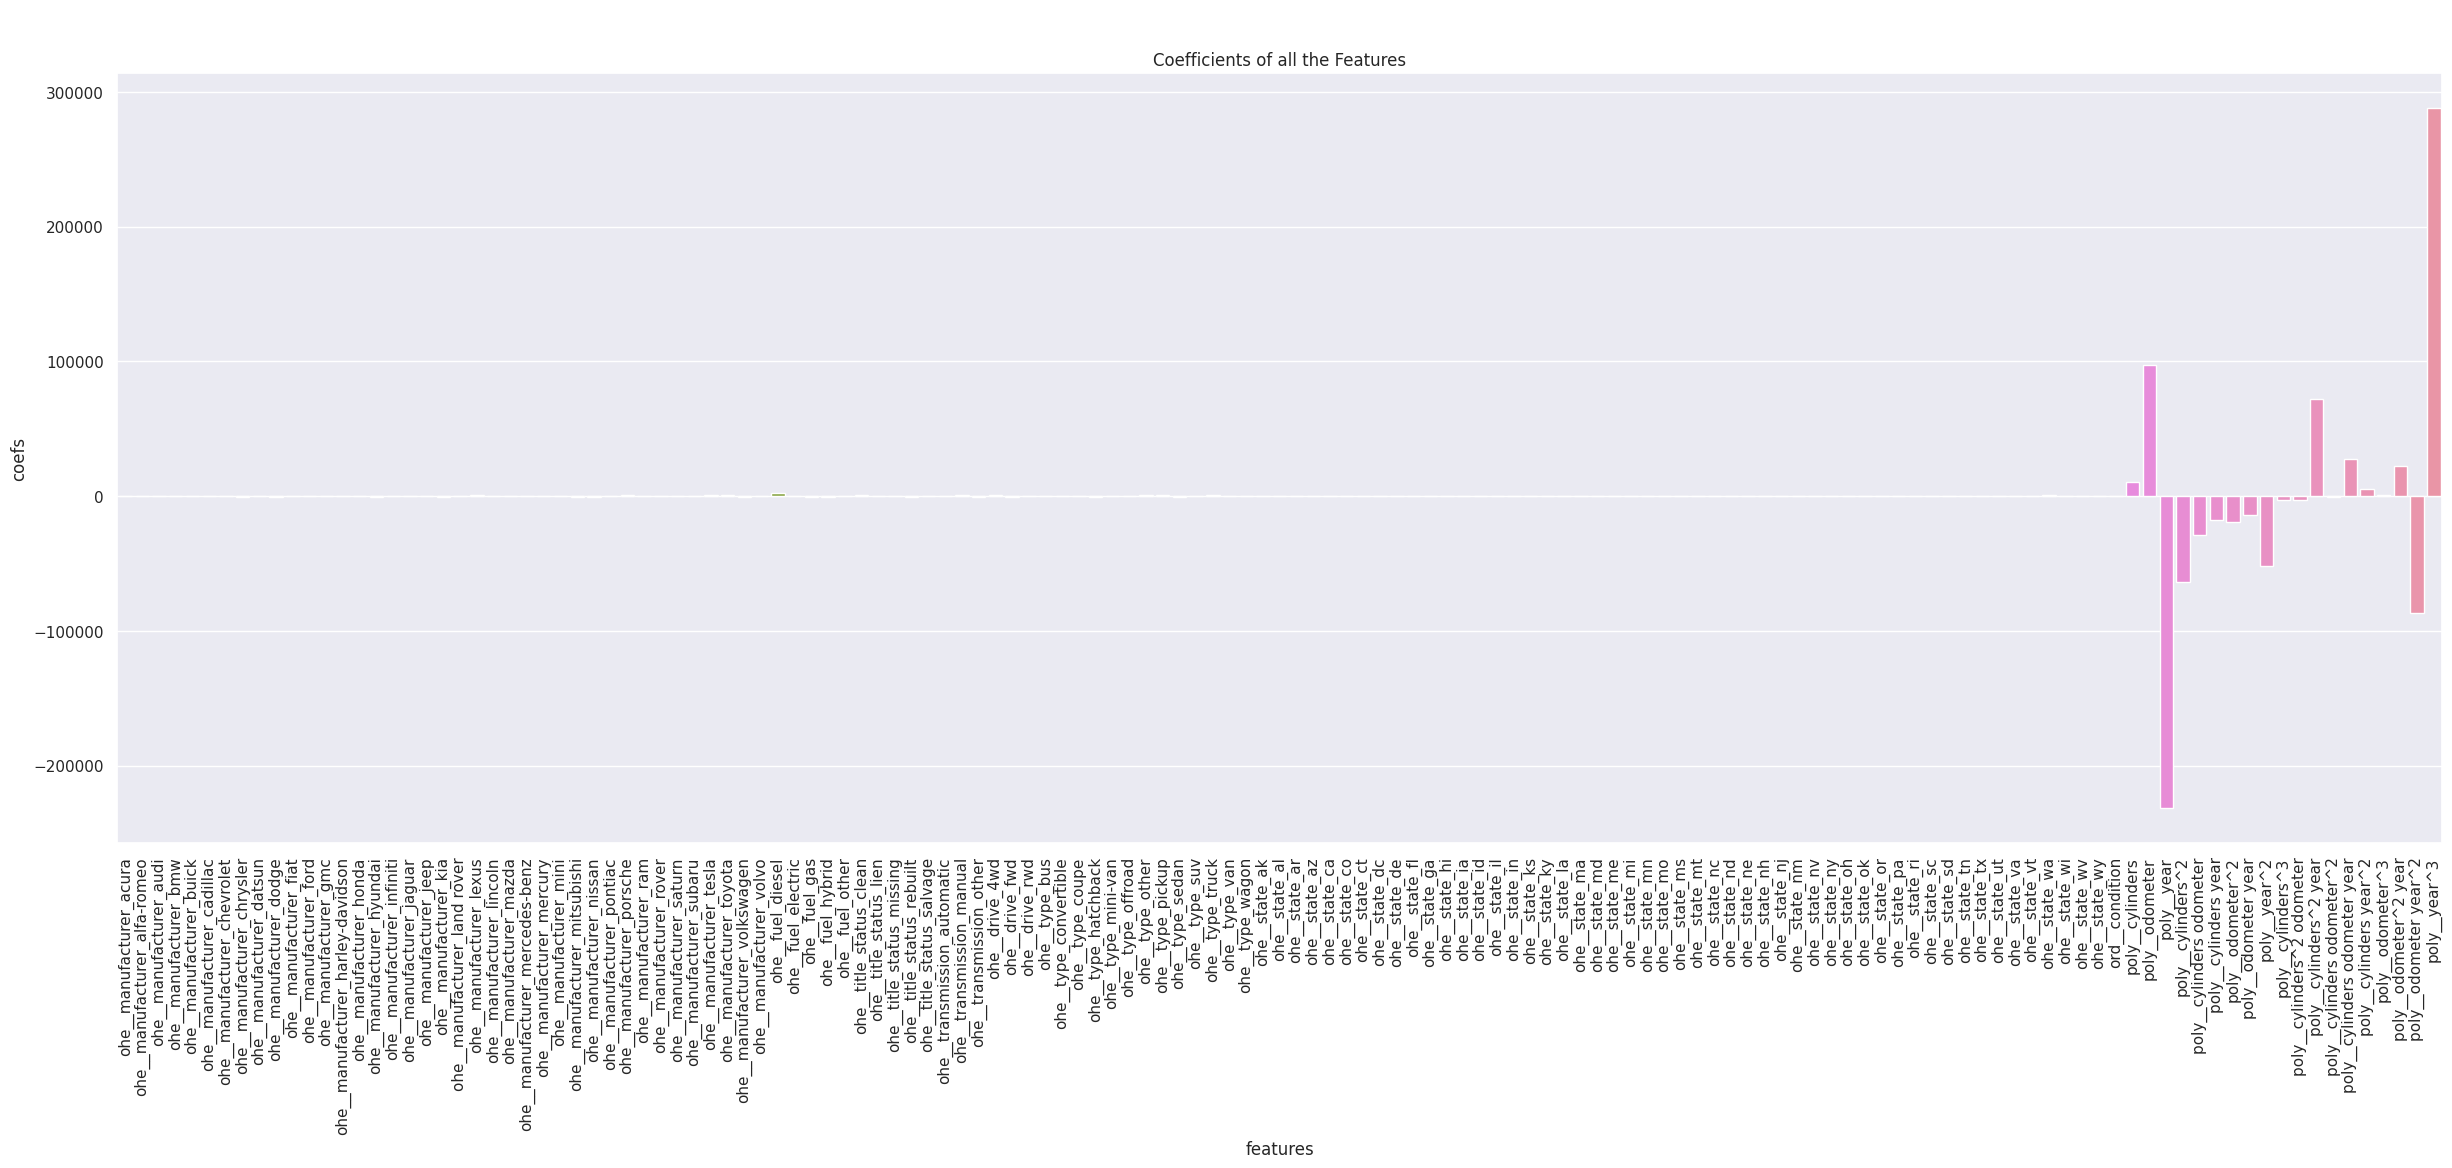

In [183]:
plt.figure(figsize=(30, 10))
sns.barplot(data=coef_features_df, x="features", y="coefs");
plt.title("\n\nCoefficients of all the Features")
plt.xticks(rotation=90);

In [184]:
def break_ohe_coefs(df, feature):
    coef_df = df[df.features.apply(lambda x: feature in x)].copy()
    coef_df.features = coef_df.features.str.replace(f"ohe__{feature}_", "")
    coef_df.features = coef_df.features.str.title()
    return {feature.title(): coef_df}


def break_poly_coefs(df):
    polycol = df[df.features.apply(lambda x: "poly_" in x)].copy()
    polycol.drop(polycol[polycol.features.apply(lambda x: "^" in x)].index, inplace=True)
    polycol.features = polycol.features.str.replace(f"poly__", "")
    polycol.features = polycol.features.str.title()
    return polycol

In [197]:
man_coef_df = break_ohe_coefs(coef_features_df, "manufacturer")
type_coef_df = break_ohe_coefs(coef_features_df, "type")
fuel_coef_df = break_ohe_coefs(coef_features_df, "fuel")
title_coef_df = break_ohe_coefs(coef_features_df, "title_status")
transmission_coef_df = break_ohe_coefs(coef_features_df, "transmission")
drive_coef_df = break_ohe_coefs(coef_features_df, "drive")
state_coef_df = break_ohe_coefs(coef_features_df, "state")

all_coefs = [man_coef_df, type_coef_df, fuel_coef_df, title_coef_df, transmission_coef_df, drive_coef_df, state_coef_df]

In [198]:
poly_cols = break_poly_coefs(coef_features_df)
poly_cols

,features,coefs
120,Cylinders,10770.177359
121,Odometer,97233.295200
122,Year,-231630.050833
124,Cylinders Odometer,-29135.040624
125,Cylinders Year,-18114.826973
127,Odometer Year,-14374.109374
133,Cylinders Odometer Year,27496.512400


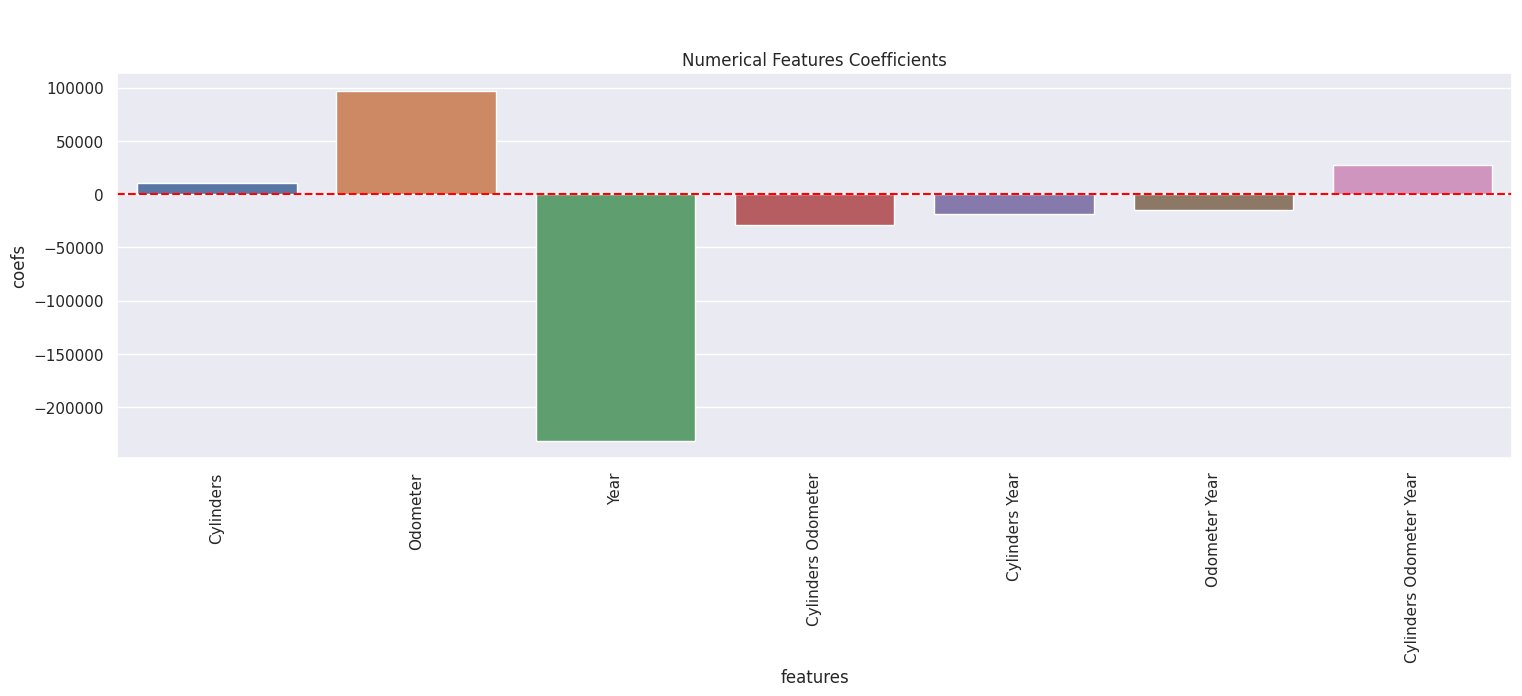

In [187]:
sns.barplot(data=poly_cols, x="features", y="coefs");
plt.title("\n\nNumerical Features Coefficients");
plt.axhline(0, color='red', linestyle='--')
plt.xticks(rotation=90);

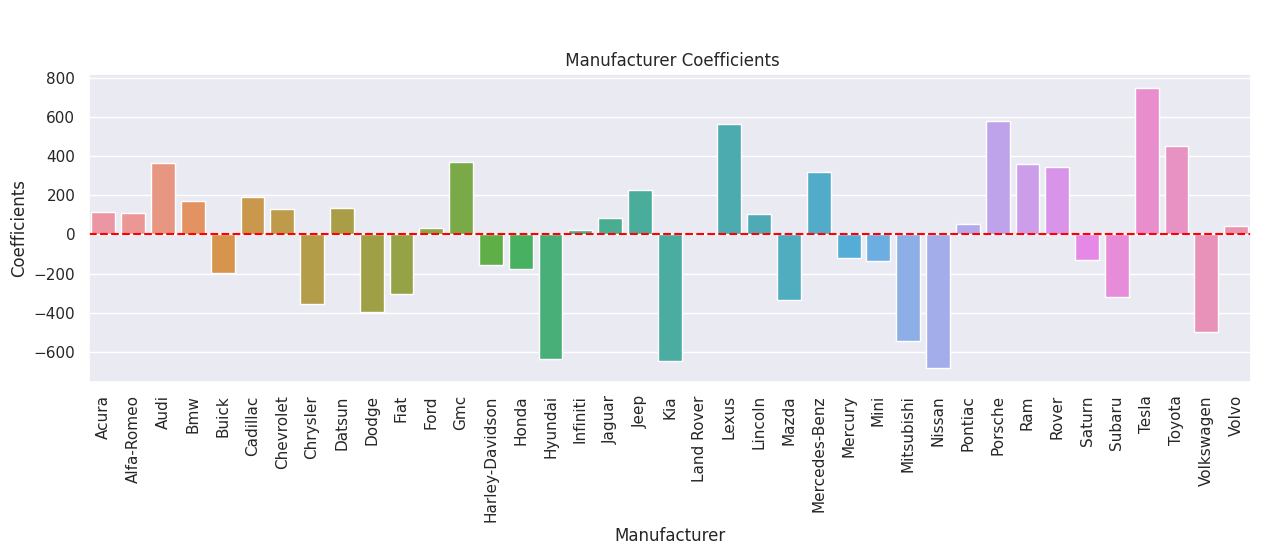

------------------------------------------------------------------------------------------------------------------------------------------------------


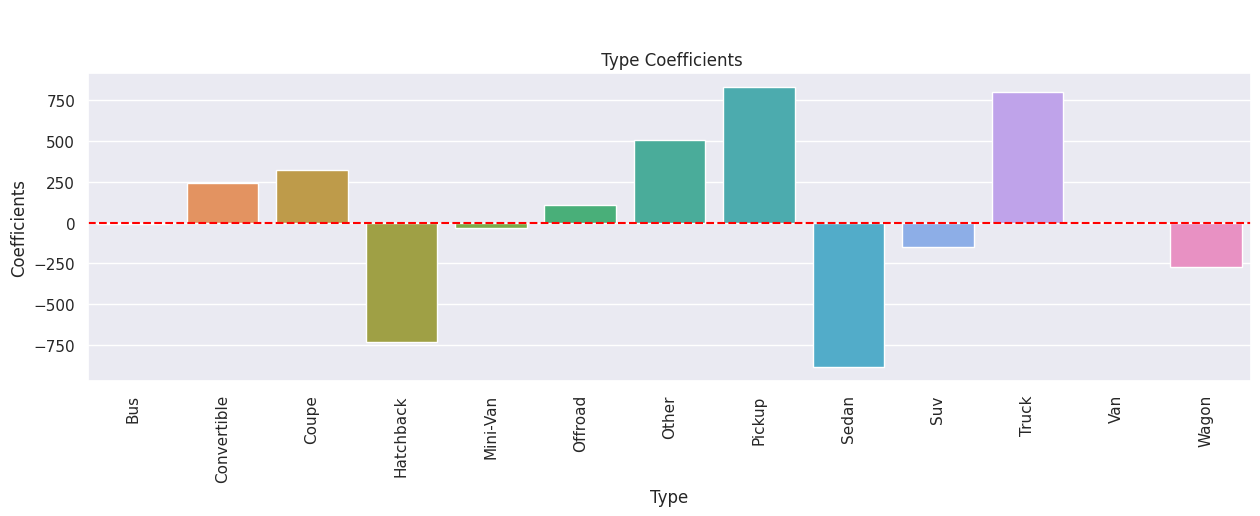

------------------------------------------------------------------------------------------------------------------------------------------------------


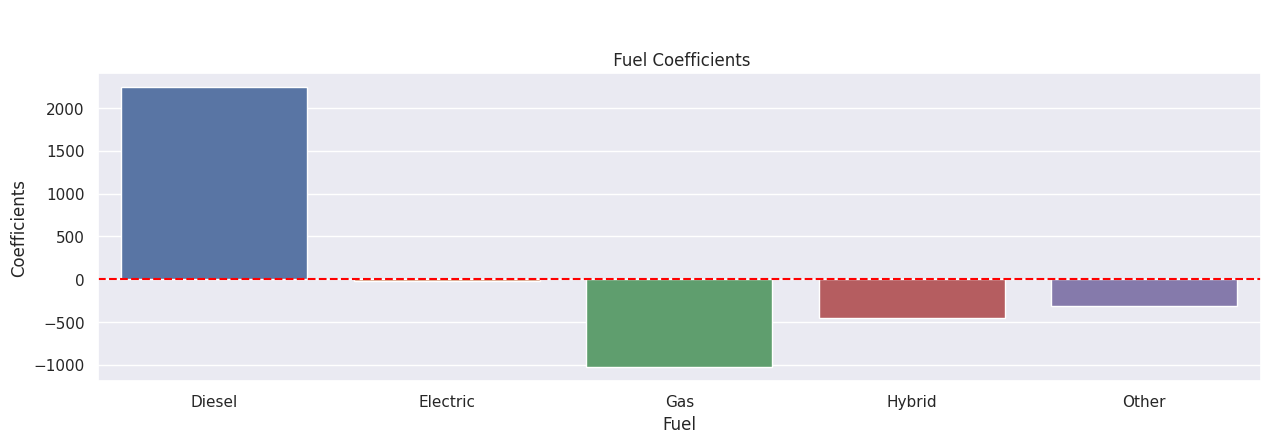

------------------------------------------------------------------------------------------------------------------------------------------------------


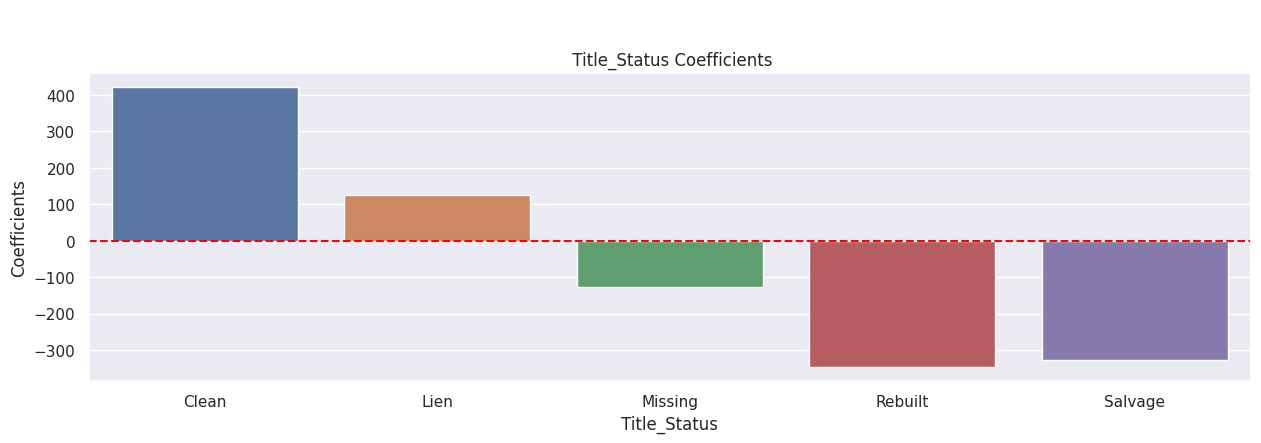

------------------------------------------------------------------------------------------------------------------------------------------------------


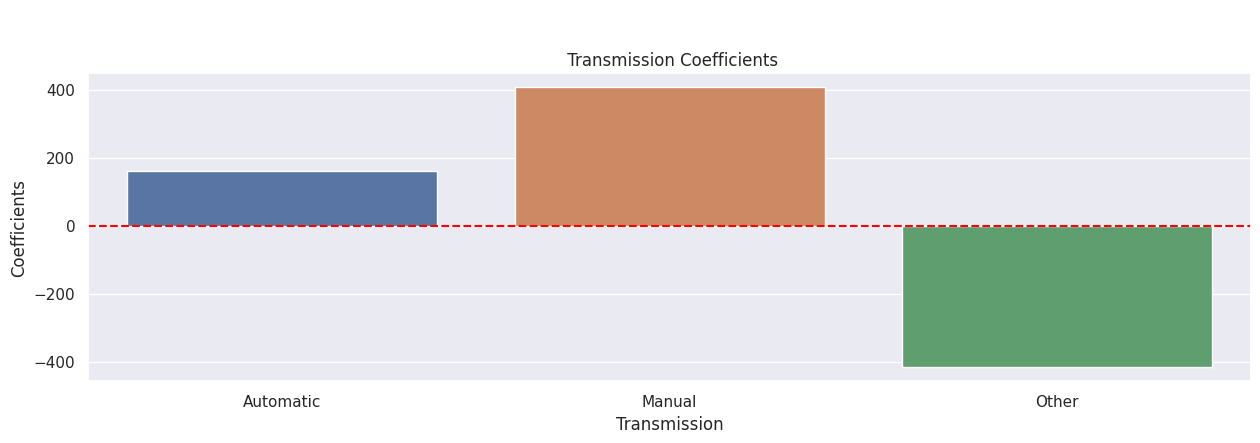

------------------------------------------------------------------------------------------------------------------------------------------------------


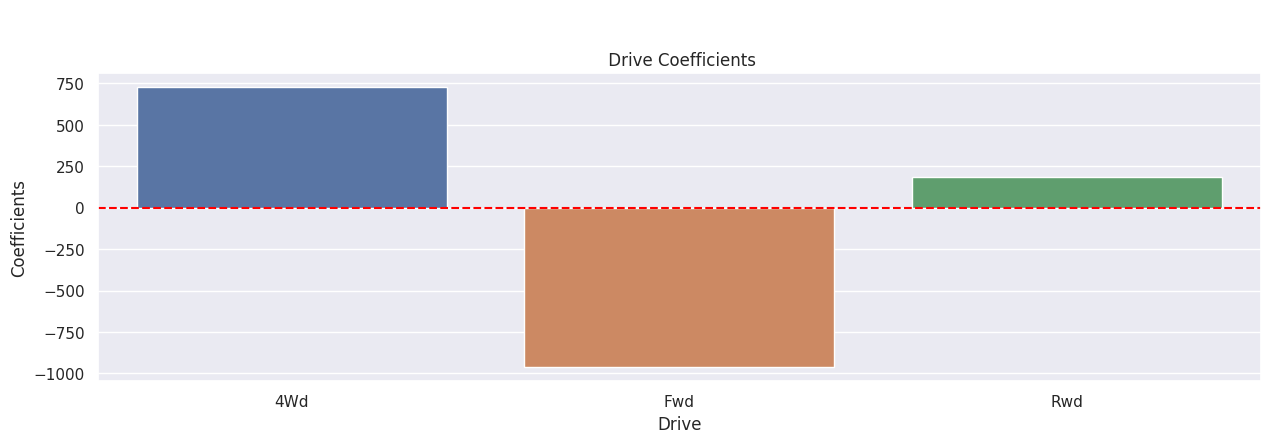

------------------------------------------------------------------------------------------------------------------------------------------------------


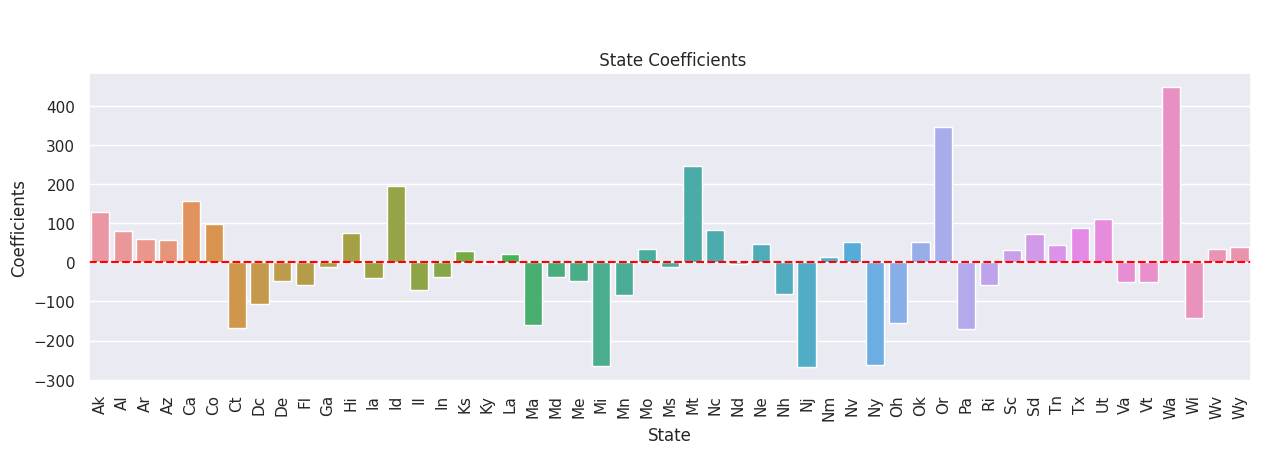

------------------------------------------------------------------------------------------------------------------------------------------------------


In [199]:
for i in all_coefs:
    label = list(i.keys())[0]
    plt.figure(figsize=(15, 4))
    dataframe = i[label]
    fig = sns.barplot(data=dataframe, x="features", y="coefs");
    fig.set_title(f"\n\n {label} Coefficients");
    plt.axhline(0, color='red', linestyle='--');
    if len(dataframe) > 10:
        plt.xticks(rotation=90);
        
    plt.xlabel(label)
    plt.ylabel("Coefficients")
    plt.show()
    print("-"*150)
    

### Testing the Model with a random Used Car and Comparing it with Kelly Blue Book Website for its accuracy 

In [189]:
# save the model to disk

filename_ridge = 'best_model_so_far.sav'
pickle.dump(best_model_ridge, open(filename_ridge, 'wb'))

In [191]:
def predict_price(used_car):
    model = pickle.load(open("best_model_so_far.sav", 'rb'))
    feature_set = [
        'manufacturer',
        'condition',
        'cylinders',
        'fuel',
        'title_status',
        'transmission',
        'drive',
        'type',
        'state',
        'year',
        'odometer'
    ]
    used_car_df = pd.DataFrame([used_car], columns=feature_set)
    display(used_car_df)
    pred_with_ridge = model.predict(used_car_df)
    msg = f"The Estimated Price Of The Given Car Is: ${round(pred_with_ridge[0], 2)}"
    return msg
    

In [205]:
my_car = [
    "honda", 
    "good", 
    4,  
    "gas", 
    "clean", 
    "automatic", 
    "fwd", 
    "sedan",
    'ca',
    2012, 
    176000
]


predict_price(my_car)

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,state,year,odometer
0,honda,good,4,gas,clean,automatic,fwd,sedan,ca,2012,176000


'The Estimated Price Of The Given Car Is: $5873.85'

In [210]:
list(state_coef_df["State"]["features"].values)

['Ak',
 'Al',
 'Ar',
 'Az',
 'Ca',
 'Co',
 'Ct',
 'Dc',
 'De',
 'Fl',
 'Ga',
 'Hi',
 'Ia',
 'Id',
 'Il',
 'In',
 'Ks',
 'Ky',
 'La',
 'Ma',
 'Md',
 'Me',
 'Mi',
 'Mn',
 'Mo',
 'Ms',
 'Mt',
 'Nc',
 'Nd',
 'Ne',
 'Nh',
 'Nj',
 'Nm',
 'Nv',
 'Ny',
 'Oh',
 'Ok',
 'Or',
 'Pa',
 'Ri',
 'Sc',
 'Sd',
 'Tn',
 'Tx',
 'Ut',
 'Va',
 'Vt',
 'Wa',
 'Wi',
 'Wv',
 'Wy']

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<h3><a href="http://anjiismail.com/ai_ml_deployments/predict-car-price/">Deployed Ridge Models</a></h3>